\
\
\
__Title: Exploratory Data Analysis on Home Energy Consumption and Weather Data__
\
\
\
__Final Term Project: Summer 2023__
\
\
\
__DSC530_Data Exploration and Analysis_Summer 2023__
\
\
\
__Author: Nage Sayali__
\
\
\
__Instructor: Cary Jim__
\
\
\
__BELLEVUE UNIVERSITY, NEBRASKA(NE)__

%%latex
\newpage

__Table of Contents:__
\
\

1. [Abstarct](Abstract)
\
2. [Data Overview and Methodology](Data-Overview-and-Methodology)
\
3. [Initial Setup](Initial-Setup)
\
4. [Data Cleaning and Preparation](Data-Cleaning-and-Preparation)
\
5. [Preliminary Analysis](Preliminary-Analysis)
\
    * [Question 1](Question-1)
    * [Question 2](Question-2)
    * [Question 3](Question-3)
\
6. [Exploratory Data Analysis](Exploratory-Data-Analysis)
\
    * [Question 4](Question-4)
    * [Question 5](Question-5)
    * [Question 6](Question-6)
    * [Question 7](Question-7)
    * [Question 8](Question-8)
    * [Question 9](Question-9)
    * [Question 10](Question-10)
\
7. [Limitations and Assumptions](Limitations-and-Assumptions)
\
8. [Summary and Conclusion](Summary-and-Conclusion)
\
\
\

__Date Created(Ver1): 7/10/2023__

%%latex
\newpage

# __Abstract__

In recent years Home Energy Consumption and Efficiency analysis has gained immense popularity with the main objective being reducing CO2 emission, Energy Cost and Improve overall home efficiency thereby saving fossil fuels. Using the latest available energy consumption data, this short paper provides a concise analysis of Home Energy Consumption focusing on some intersting questions that are formed solely for this analysis purpose. With the current dataset at hands we can try to learn our daily energy consumption and see it changes with season or weather.  We will try to find answers to these questions, look at our findings, gain new perspective and draw conclusions by performing various data exploration and analysis techniques using probability and statistics.

# __Data Overview and Methodology__

The original dataset has thirty two fields of records as mentioned below which include the time at which the data is recorded, energy consumption, generation by means of solar or similar source, and readings of all individual equipment's power consumption and weather conditions. While these all fields are importatant and can be utilise for energy use and load forecasting for similar weather conditions we will skim through the data required for our analysis.

    0   time                 time
    1   use [kW]             Total energy consumption
    2   gen [kW]             Total energy generated by means of solar or other power generation resources
    3   House overall [kW]   overall house energy consumption
    4   Dishwasher [kW]      energy consumed by specific appliance
    5   Furnace 1 [kW]       energy consumed by specific appliance
    6   Furnace 2 [kW]       energy consumed by specific appliance
    7   Home office [kW]     energy consumed by specific appliance
    8   Fridge [kW]          energy consumed by specific appliance
    9   Wine cellar [kW]     energy consumed by specific appliance
    10  Garage door [kW]     energy consumed by specific appliance
    11  Kitchen 12 [kW]      energy consumption in kitchen 1
    12  Kitchen 14 [kW]      energy consumption in kitchen 2
    13  Kitchen 38 [kW]      energy consumption in kitchen 3
    14  Barn [kW]            energy consumed by specific appliance
    15  Well [kW]            energy consumed by specific appliance
    16  Microwave [kW]       energy consumed by specific appliance
    17  Living room [kW]     energy consumption in Living room
    18  Solar [kW]           Solar power generation
    19  temperature          temperature
    20  icon                 overall weather condition 
    21  humidity             humidity
    22  visibility           visibility
    23  summary              summarise weather 
    24  apparentTemperature  apparent temperature
    25  pressure             pressure
    26  windSpeed            wind speed
    27  cloudCover           cloudcover 
    28  windBearing          windbearing
    29  precipIntensity      precipitation Intensity
    30  dewPoint             dew point
    31  precipProbability    precipitation probability

After analyzing all fields, it seems some of the variables contains same records such as "house overall" and "use", "solar" and "gen", first step of this data analysis would be to create a dataset that contains only the fiels that supports our theory, does not have NA value and are in correct format for analysis. 

Once we have selected and restructred our data next we will identify and study the outliers for their significance by plotting their individual histogram and remove all data that is not not valid. After this step we will have cleansed data ready for exploratory analysis.

In exploratory analysis we will perform various data operations similar to what we have encountered in the reference book Think Stats, where for some code we will utilize Author's code and some standard libraries to perform statistical analysis.

Once we form the questions for our analysis, perfoming tests and reading results from exploratory analysis will give us thorough understanidng of each of the individual fields along with its effect on other variables. Based on this we can conclude the results as whether they support our initial theory along with limitations and scope of improvement in our research.

%%latex
\newpage

# __Initial Setup__

In this section, we will download and read the source data file from https://www.kaggle.com/ and store the data in our destination library. Download and import all the required libraries and packages along with Author's source code form https://github.com/AllenDowney/ThinkStats2 Githib Repository.

At the end of this section we will have a restructured and cleansed dataset along with all the libraries loaded for their applications throughout this notebook.

In [1]:
# Using basename and exists functions from OS module to be used for setting up function
import os
from os.path import basename, exists

# Creating a function named get_file, to download the scripts and files from Github to local directory which 
# takes url as input.

def get_file(url):
    filename = basename(url)
    # Using if statement to check whether the file already exists in the local directory and if not it will be 
    # downloaded in the given path.
    if not exists(filename):
        from urllib.request import urlretrieve
        # Downloading the files to the local path
        local, _ = urlretrieve(url, filename)
        # Printing confirmation message
        print("Downloaded " + local)

In [2]:
#  Calling download functions to download .py files and data files used throughtout this project
get_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
get_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import thinkplot
import thinkstats2
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import patsy
import statistics as st
from scipy import stats
import sklearn
from math import sqrt

In [4]:
# Dataset Source:  https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information
def read_EnergyData():
    energy_consumption = pd.read_csv(r"C:\Users\Sayali\Desktop\Exercise_DSC530\Project_data\HomeC.csv", 
                                     low_memory = False)
    
    return energy_consumption

In [5]:
read_EnergyData().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

%%latex
\newpage

# Data Cleaning and Preparation

This paper explores the dataset from https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information which contains energy consumption data of a house. To keep our analysis limited to a a specific time frame, we will be limiting th edata points for five years records. Some data cleaning operations performed in below functions are as follows

* def cleanse_df:
    * Fill the invalid values in cloud cover field with valid available data.
    * Combining(summing) furnace1, furnace2 data into a single value field.
    * Combining(summing) Kitchen1, kitchen2, kitchen3 data into a single value field.
    * Remove null values in dataframe.
    * Remove 'KW' from all columns that represents the unit of energy consumption.


* def format_df:
    * Rename all variables that are space seperated into uniform names format.
    * Drop unwanted datafield that are not required for this research.
    * Drop Duplicate data fields and select only the fields required for this paper.
    * Change format of datafield "time" which represent the time at which data is recorded.
    * Change frequency of data recorded from minute to per day.
    * Lowercase all datafileds to maintain throughout uniformity.

* def Add_Columns:
    * Add year column derived from date to study yearly pattern
    * Add month column derived from date to study monthly pattern
    * Add weekday column derived from date to study weekdays pattern

* def create_newdf:
    * Calls all above functions, takes orginal dataframe and return a updated dataframe that we will use throughout in this study.

Once all the necessary data cleaning and modification operations are performed we will end up with a new dataframe for furthur analysis.

%%latex
\newpage

In [6]:
# Creating a function to clean the original dataframe and result into a desirable new df 
# It takes a copy of original dataframe, perform cleaning operatuion and returns a new dataframe
def cleanse_df(energy_consumption):

    # taking a copy of the original data to perform modifications
    energy_df = energy_consumption.copy()
    # Removing the null values in fields 
    energy_df = energy_df.dropna()
    # Replacing invalid data in cloudcover field with valid ones
    energy_df["cloudCover"].replace(["cloudCover"], method = "bfill", inplace = True)
    energy_df["cloudCover"] = energy_df["cloudCover"].astype("float")
    # Removing unit of measurement diplayed in each field for easy operation
    energy_df.columns = [i.replace(" [kW]", '') for i in energy_df.columns]
    # Creating a single data field for subdivided variables 
    energy_df["furnace"] = energy_df[["Furnace 1", "Furnace 2"]].sum(axis = 1)
    energy_df["kitchen"] = energy_df[["Kitchen 12", "Kitchen 14", "Kitchen 38"]].sum(axis = 1)

    return energy_df

In [7]:
# Creating a function to format/modify the new dataframe into a desirable order
def format_df(energy_df):
#     energy_df["summary"].unique()
#     energy_df["cloudCover"].unique()
# 'cloudCover' field has (58 rows) on invalid data, replacing these invalid values with the next valid value.
    energy_df = energy_df.rename(columns = {"House overall": "house_overall", "Home office": "home_office",
                                            "Wine cellar": "wine_celler" , "Garage door": "garage_door",
                                            "Living room": "living_room", "apparentTemperature": "apparent_temperature", 
                                            "windBearing": "wind_bearing", "cloudCover": "cloud_cover" , 
                                            "precipIntensity": "precip_intensity", "precipProbability": "precip_probability", 
                                            "dewPoint": "dew_point"})
    energy_df.drop(["Furnace 1", "Furnace 2", "Kitchen 12", "Kitchen 14", "Kitchen 38", "icon", "summary"], 
                   axis = 1, inplace = True)
    # Dropping the duplicate data fields such as:  use == house_overall, gen == solar
    energy_df.drop(["use", "gen"], axis = 1, inplace = True)
    # Rounding data to have better readability
    energy_df["house_overall"] = energy_df["house_overall"].apply(lambda x: round(x, 3))
    energy_df = energy_df[["time", "house_overall", "Dishwasher", "home_office", "Fridge", "wine_celler", "garage_door",
                           'Barn',"Well", "Microwave", "living_room", "furnace", "kitchen", "Solar", "temperature", 
                           "humidity", "visibility", "apparent_temperature", "pressure", "windSpeed", "cloud_cover", 
                           "wind_bearing", "precip_intensity", "dew_point", "precip_probability"]]
    # Convert Unix timestamp to datetime, use sample frequency of day and store it dataframe
    pd.to_datetime(energy_df["time"], unit = "s")
    energy_df["time"] = pd.DatetimeIndex(pd.date_range("2016-01-01 05:00", periods = len(energy_df),  freq = "H"))
    energy_df = energy_df[(energy_df['time'] >= "2018-01-01") & (energy_df['time'] < "2023-01-01")]
    energy_df["time"] = pd.DatetimeIndex(pd.date_range("2020-01-01 00:00", periods = len(energy_df),  freq = "D"))
    # Lowercase all datafields 
    energy_df.columns = [i.lower() for i in energy_df.columns]

    return energy_df

In [8]:
# Creating a function that add new column to dataframe whoch we might use in furthur analysis
def Add_Columns(energy_df):
    # Deriving new data from time field and storing results as a new variable in dataframe
    energy_df["year"] = energy_df["time"].apply(lambda x : x.year)
    energy_df["month"] = energy_df["time"].apply(lambda x : x.month)
    energy_df["weekday"] = energy_df["time"].apply(lambda x : x.day_name())
    return energy_df

In [9]:
# Creating a function that takes original data and calls above functions to perform data cleaning and modification 
# operations and return a new dataframe
def create_newdf():

    energy_consumption = read_EnergyData()
    energy_df = cleanse_df(energy_consumption)
    energy_df = format_df(energy_df)
    energy_df = Add_Columns(energy_df)
    return energy_consumption, energy_df

In [10]:
# Calling create_newdf functions to create a new energy consumption dataframe and showing data structure
energy_consumption, energy_df = create_newdf()
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 17539 to 61362
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  43824 non-null  datetime64[ns]
 1   house_overall         43824 non-null  float64       
 2   dishwasher            43824 non-null  float64       
 3   home_office           43824 non-null  float64       
 4   fridge                43824 non-null  float64       
 5   wine_celler           43824 non-null  float64       
 6   garage_door           43824 non-null  float64       
 7   barn                  43824 non-null  float64       
 8   well                  43824 non-null  float64       
 9   microwave             43824 non-null  float64       
 10  living_room           43824 non-null  float64       
 11  furnace               43824 non-null  float64       
 12  kitchen               43824 non-null  float64       
 13  solar       

%%latex
\newpage

# __Preliminary Analysis__

## Question 1:
__A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).__

While we study various fields of this datsets such as overall energy consumption over time to find ___Whether our Energy Needs changes with season or with a time of day___, the exploratory analysis might also help understand some more important aspects of our energy use such as kitchen use, furnace use, individual power consumption of appliances and weather conditions such as temperature and cloud cover. While we find answer to our main question, we can also hope to find answers to some of the following questions with the use of below mentioned variables,

1. Does our oevrall energy demand change with weather conditions?
    - house_overall and month data

2. Do kitchen appliances such as Microwave or dishwasher consume more energy than any other appliances?
    - energy data

3. Do we consume more enegry on weekends vs on weekdays?
    - house_overall and weekday data

4. Is our energy consumption more in summer than in winter?
    - house_overall and month data

5. Does alternate energy sources such as solar generate more energy in summer than in winter?
    - solar and month data

5. Do we consume more energy than we generate?
    - house_overall and solar data

%%latex
\newpage

## Question 2:

__Describe what the 5 variables mean in the dataset (Chapter 1).__

In this paper we will try to utilize as many of the following variables the overall energy consumption over time, kitchen use, furnace use, individual power consumption of appliances and weather conditions such as temperature and cloud cover to answer the questions.

+ __INDEX:__
    * time: Time of the readings, with a time span of 1 minute.
    
+ __ENERGY DATA:__
    * house_overall:Total energy consumption
    * dishwasher: energy consumed by specific appliance
    * furnace: energy consumed by specific appliance
    * Home office: energy consumed by specific appliance
    * fridge: energy consumed by specific appliance
    * wine_cellar: energy consumed by specific appliance
    * garage_door: energy consumed by specific appliance
    * kitchen: energy consumption in kitchen 1
    * barn: energy consumed by specific appliance
    * well: energy consumed by specific appliance
    * microwave: energy consumed by specific appliance
    * living_room: energy consumption in Living room
    * solar: Total energy generated by means of solar or other power generation resources

+ __WEATHER DATA:__
    * temperature: physical quantity expressing hot and cold
    * humidity: concentration of water vapour present in air
    * visibility: meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value
    * apparentTemperature: temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed
    * pressure: Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
    * windspeed: fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature
    * cloud_cover: fraction of the sky obscured by clouds when observed from a particular location
    * wind_bearing: In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
    * dew_point: the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form
    * precip_probability: measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location
    * precip_intensity: measure of the amount of rain that falls over time

+ __TIMEFRAME:__
    * year: yearly energy data
    * month: monthly energy data
    * weekday: week of the day energy data

%%latex
\newpage

## Question 3:

__Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2)__

In preliminary analysis, we will study the nature of individual data field with the use of Histograms, Boxplots of outliers, we will study and analyze this data and remove all invalid datapoints that might affect overall accuracy of the results.

We will create functions that will return histograms, boxplots of outliers as well as remove unwanted datapoints in the process of meeting project requirement provided in this term's project overview.

In [11]:
# Creating a function that will return a histgram of input variable in the dataframe
# It takes dataframe, variable, label (axis label), bins (bin size), and outliers (initially set as true) as input
# and returns a hostograme of the variable

def Histogram(input_df1, var1, desc11, bins = 10, outliers = True):

    # Removing the NA values and plotting the histogram
    variab1 = input_df1[var1].dropna()
    hist_var = np.histogram(variab1, bins = bins)
    #print(f"The Histogram of {var1} is {hist_var}")
    plt.hist(variab1, color = "darkslategray", edgecolor = "white")
    # Using the outlier flag to display data with outliers in the title
    if outliers:
        plt.title(f"Histogram {desc11}(with Outliers)")
    else:
        plt.title(f"Histogram {desc11}(without Outliers)")
    plt.xlabel(f"{desc11}")
    plt.ylabel("Frequency")

%%latex
\newpage

In [12]:
# Creating a function to remove outliers in the input variable if any.
# It takes dataframe and variable as input and returns cleansed data along with the statistical summary of input variabe
# It also plots boxplot by identifying and calculating the outliers values
def eliminateOutliers(input_df1, var1):

    # Removing the NA values in the field and plotting a boxplot to represent the outliers
    variab1 = input_df1[var1].dropna()
    sns.boxplot(data = input_df1, x = variab1, color = "darkslategray").set(title = 'Boxplot')
    # Calculating First, Third and Inner quartile(difference between first and Third quartile)
    var_Q1 = variab1.quantile(0.25)
    var_Q3 = variab1.quantile(0.75)
    var_IQ = var_Q3-var_Q1
    print(f"Summary of Outliers in {var1} field")
    print(f"Inter Quartile range:{var_IQ}")
    # Calculating the Lower and Upper whiskers to identify the Outliers
    var_LW = var_Q1-1.5*var_IQ
    var_UW = var_Q3+1.5*var_IQ
    print(f"Lower Whisker: {var_LW}, Upper Whisker: {var_UW} ")
    # Removing the values below lower wiskers and above upper whiskers to exclude the outliers and printing the summary
    input_df1 = input_df1[variab1 > var_LW]
    input_df1 = input_df1[variab1 < var_UW]
    new_variab = input_df1[var1].dropna()
    print(f"Summary after removing Outliers: {new_variab.describe()}")
    return input_df1

%%latex
\newpage

__Plotting Histogram of individual variables as original data(with outliers)__

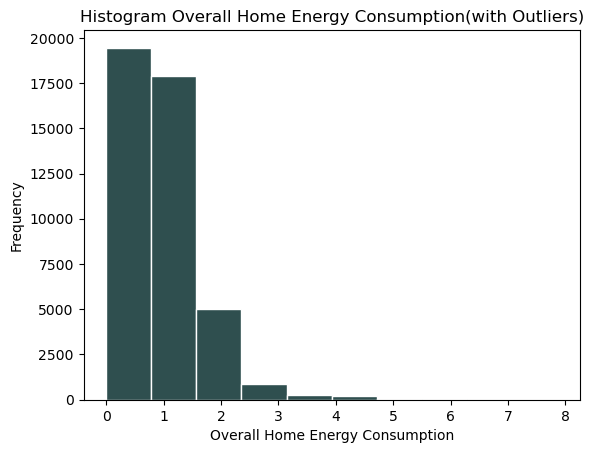

In [13]:
# Plotting histograms of overall energy consumption with outliers
Histogram(energy_df, "house_overall", "Overall Home Energy Consumption")

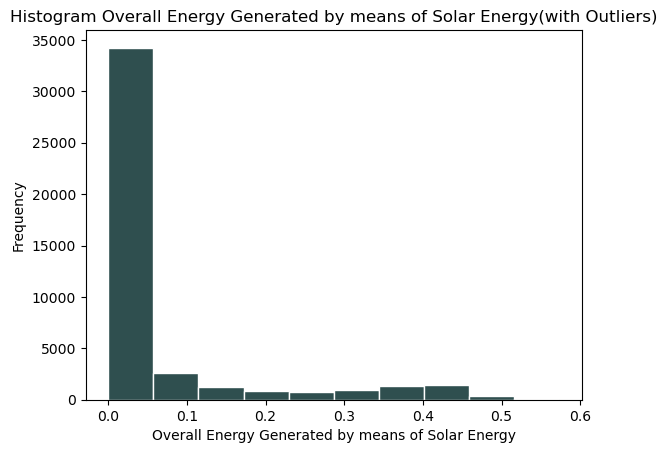

In [14]:
# Plotting histograms of overall energy generation with outliers
Histogram(energy_df, "solar", "Overall Energy Generated by means of Solar Energy")

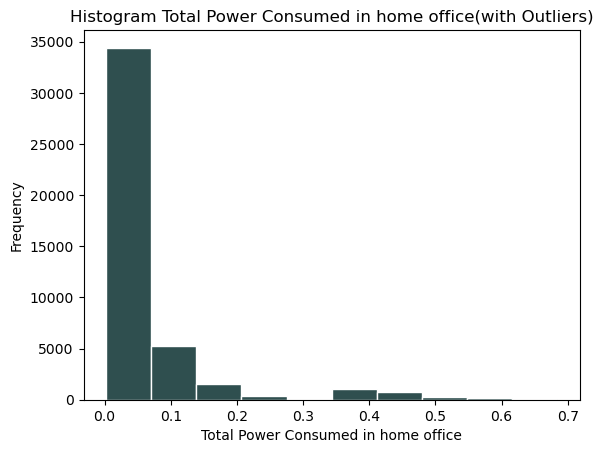

In [15]:
# Plotting histograms of energy consumed home_office with outliers
Histogram(energy_df, "home_office", "Total Power Consumed in home office")

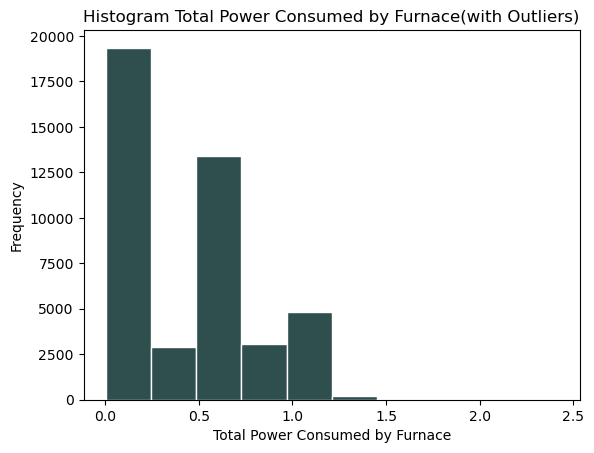

In [16]:
# Plotting histograms of energy consumed by furnace with outliers
Histogram(energy_df, "furnace", "Total Power Consumed by Furnace")

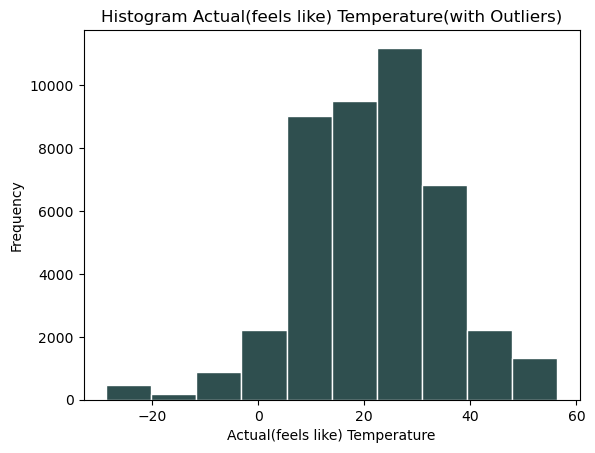

In [17]:
# Plotting histograms of apparent temperature with outliers
Histogram(energy_df, "apparent_temperature", "Actual(feels like) Temperature")

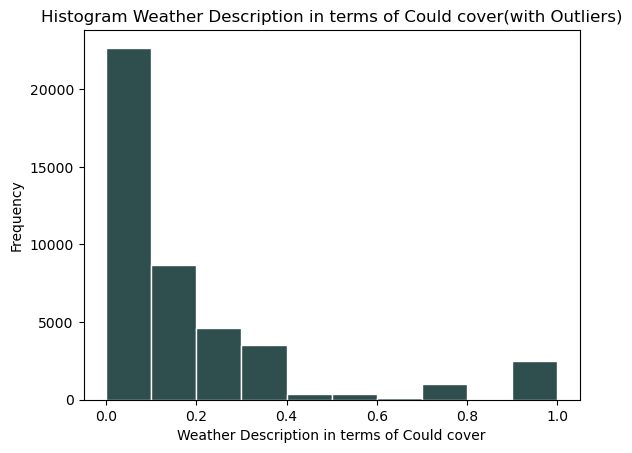

In [18]:
# Plotting histograms of cloud cover with outliers
Histogram(energy_df, "cloud_cover", "Weather Description in terms of Could cover")

__Validating and removing the outliers__

Summary of Outliers in house_overall field
Inter Quartile range:0.818
Lower Whisker: -0.7219999999999999, Upper Whisker: 2.55 
Summary after removing Outliers: count    42708.000000
mean         0.923931
std          0.521519
min          0.000000
25%          0.499000
50%          0.850000
75%          1.272000
max          2.549000
Name: house_overall, dtype: float64


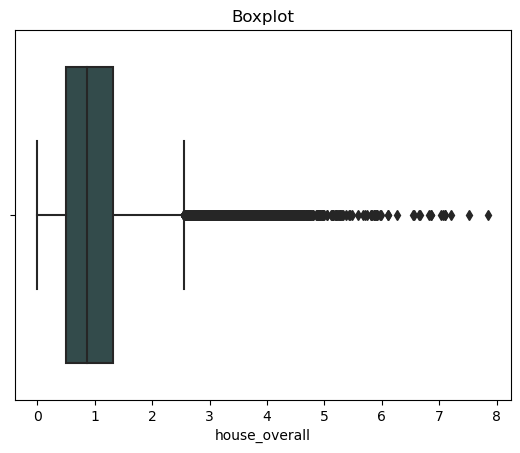

In [19]:
# Removing the outliers from house_overall datafield 
energy_df = eliminateOutliers(energy_df, "house_overall")
# energy_df = energy_df[energy_df.house_overall >= 0]
# energy_df = energy_df[energy_df.house_overall <= 3 ]

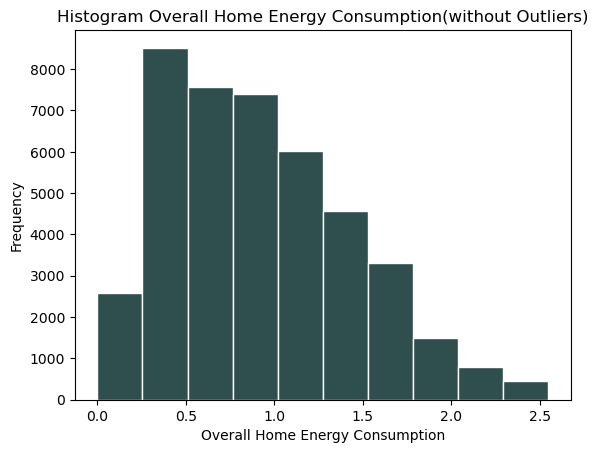

In [20]:
# Plotting histograms of overall energy consumption after eliminating outliers
Histogram(energy_df, "house_overall", "Overall Home Energy Consumption", outliers = False)

Summary of Outliers in solar field
Inter Quartile range:0.031916667
Lower Whisker: -0.0448416675, Upper Whisker: 0.0828250005 
Summary after removing Outliers: count    34558.000000
mean         0.008478
std          0.015369
min          0.000000
25%          0.003000
50%          0.003250
75%          0.003450
max          0.082817
Name: solar, dtype: float64


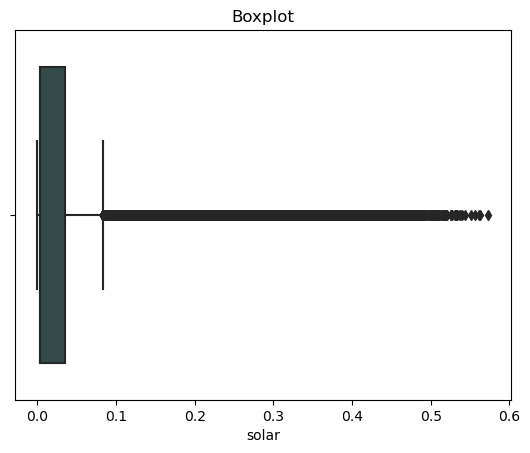

In [21]:
# Removing the outliers from dataframe
energy_df = eliminateOutliers(energy_df, "solar")
# energy_df = energy_df[energy_df.solar >= 0]
# energy_df = energy_df[energy_df.solar <= 0.08 ]

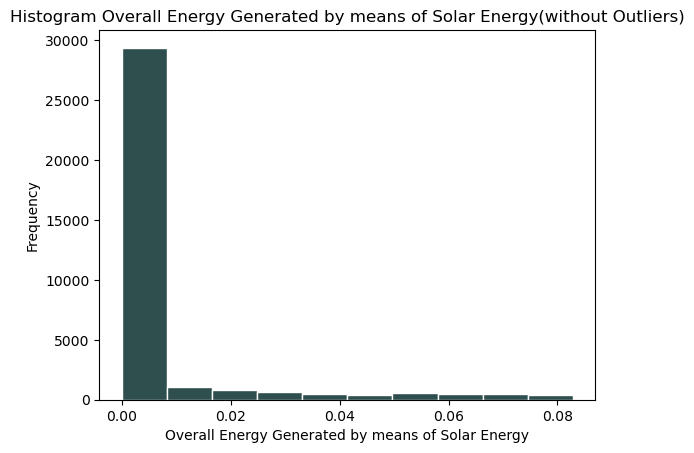

In [22]:
# Plotting histograms of overall energy generation after eliminating outliers
Histogram(energy_df, "solar", "Overall Energy Generated by means of Solar Energy", outliers = False)

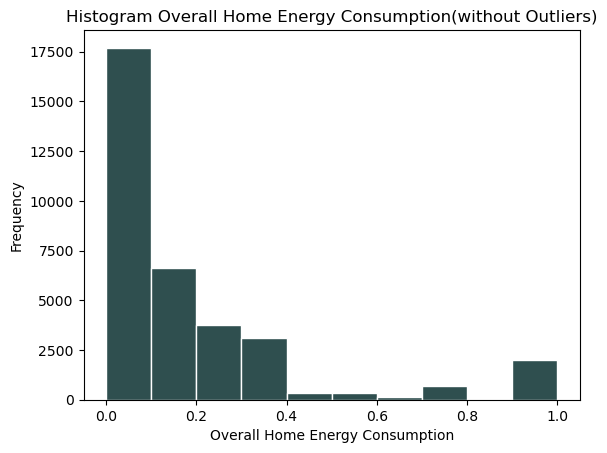

In [23]:
# Plotting histograms of cloud cover after eliminating outliers
Histogram(energy_df, "cloud_cover", "Overall Home Energy Consumption", outliers = False)

Summary of Outliers in apparent_temperature field
Inter Quartile range:17.409999999999997
Lower Whisker: -13.804999999999994, Upper Whisker: 55.834999999999994 
Summary after removing Outliers: count    34157.000000
mean        21.832698
std         12.126056
min        -11.830000
25%         12.790000
50%         22.170000
75%         29.670000
max         55.820000
Name: apparent_temperature, dtype: float64


C:\Users\Sayali\AppData\Local\Temp\ipykernel_1392\242868416.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input_df1 = input_df1[variab1 < var_UW]


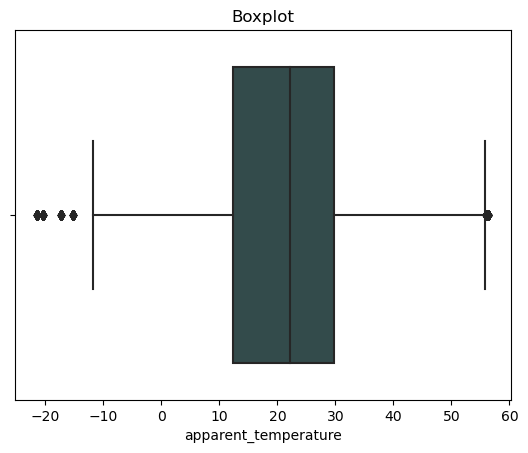

In [24]:
# Removing the outliers from dataframe
energy_df = eliminateOutliers(energy_df, "apparent_temperature")
# energy_df = energy_df[energy_df.apparent_temperature >= -5]
# energy_df = energy_df[energy_df.apparent_temperature <= 45 ]

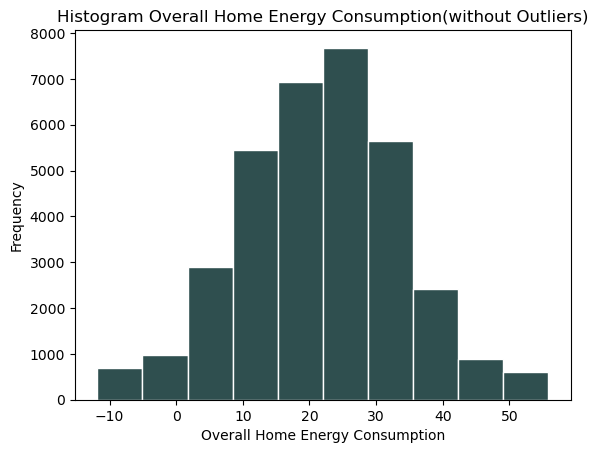

In [25]:
# Plotting histograms of apparent temperature after eliminating outliers
Histogram(energy_df, "apparent_temperature", "Overall Home Energy Consumption", outliers = False)

Summary of Outliers in furnace field
Inter Quartile range:0.5566
Lower Whisker: -0.704183334, Upper Whisker: 1.5222166659999998 
Summary after removing Outliers: count    34151.000000
mean         0.453717
std          0.348900
min          0.005083
25%          0.130708
50%          0.491967
75%          0.687233
max          1.470967
Name: furnace, dtype: float64


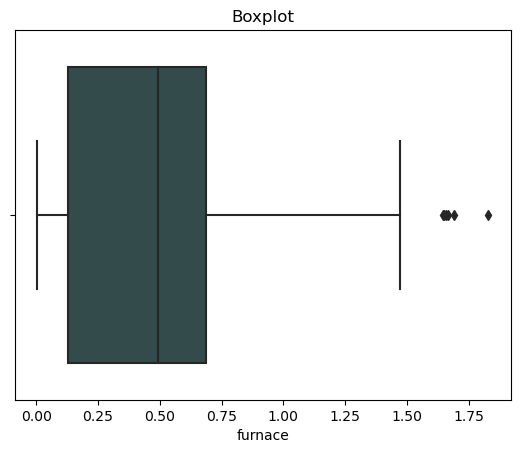

In [26]:
# Calling the function to remove outliers as per lower and upper whisker value
energy_df = eliminateOutliers(energy_df, "furnace")

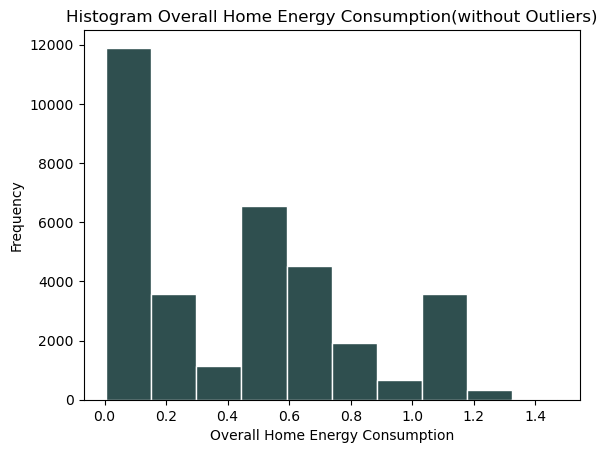

In [27]:
# Plotting histograms of energy consumed by furnace after eliminating outliers
Histogram(energy_df, "furnace", "Overall Home Energy Consumption", outliers = False)

Summary of Outliers in living_room field
Inter Quartile range:0.00018333399999999984
Lower Whisker: 0.0012083320000000003, Upper Whisker: 0.0019416679999999997 
Summary after removing Outliers: count    27306.000000
mean         0.001563
std          0.000119
min          0.001217
25%          0.001500
50%          0.001583
75%          0.001650
max          0.001933
Name: living_room, dtype: float64


C:\Users\Sayali\AppData\Local\Temp\ipykernel_1392\242868416.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input_df1 = input_df1[variab1 < var_UW]


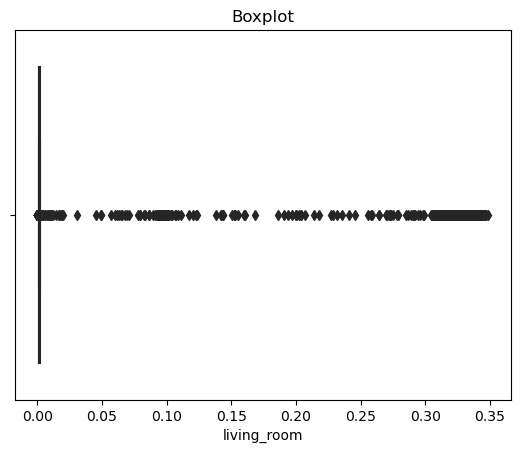

In [28]:
# Calling the function to remove outliers as per lower and upper whisker value
energy_df = eliminateOutliers(energy_df, "living_room")

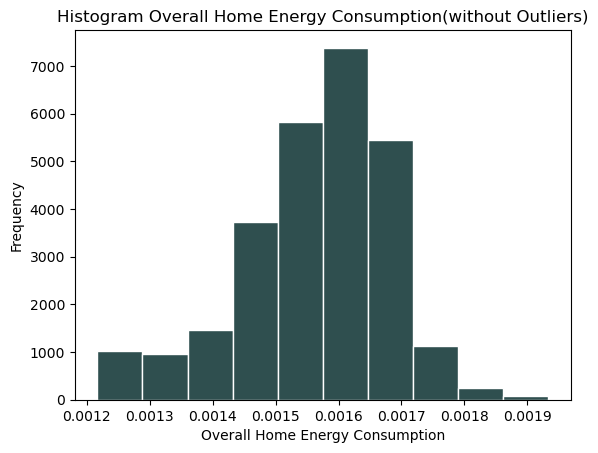

In [29]:
# Plotting histograms of energy consumed by living_room after eliminating outliers
Histogram(energy_df, "living_room", "Overall Home Energy Consumption", outliers = False)

Summary of Outliers in home_office field
Inter Quartile range:0.026583332999999994
Lower Whisker: 0.001641667500000006, Upper Whisker: 0.10797499949999999 
Summary after removing Outliers: count    22314.000000
mean         0.046878
std          0.012999
min          0.037767
25%          0.041350
50%          0.042067
75%          0.043833
max          0.107967
Name: home_office, dtype: float64


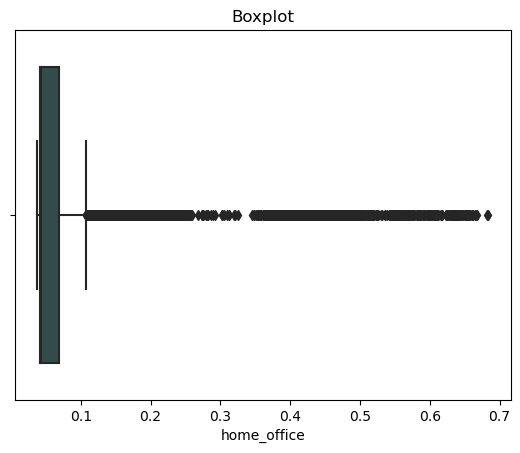

In [30]:
# Calling the function to remove outliers as per lower and upper whisker value
energy_df = eliminateOutliers(energy_df, "home_office")

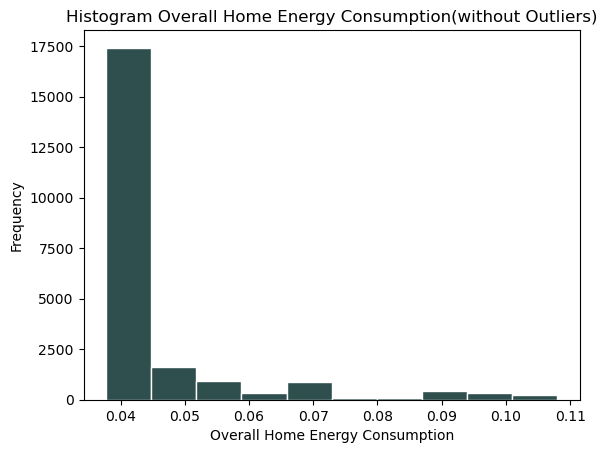

In [31]:
# Plotting histograms of energy consumed by home_office after eliminating outliers
Histogram(energy_df, "home_office", "Overall Home Energy Consumption", outliers = False)

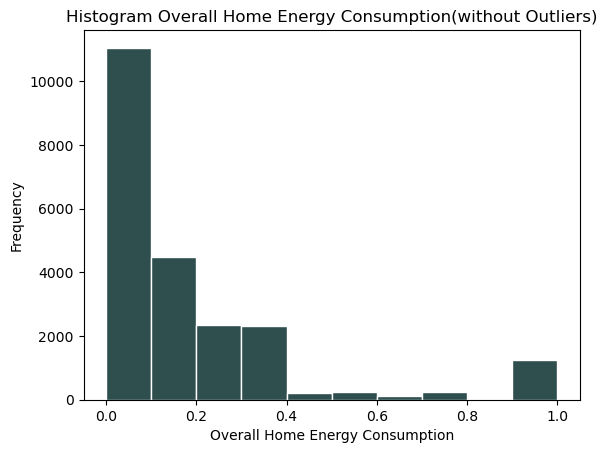

In [32]:
# Plotting histograms of energy consumed by cloud_cover after eliminating outliers
Histogram(energy_df, "cloud_cover", "Overall Home Energy Consumption", outliers = False)

__Handling Outliers__

The presence of outliers in dataset can be a result of data entry error, system malfunction, power surges, weather storms; while such data can mean a usefull information for unsual weather and energy predictions, as our foucs of study is to learn the consumption and generation pattern, removing the outliers on the basis of domain knowledge would be very useful in this case as we try to keep data uniform and ideal in nature. Similary, assuming the unit of measurement for apparent temperature is degree Celsius, removing the values below -5 and above 55 would make a suitable change for the nature of this study. All the remaining variables are furthur cleansed with a function to eliminate the outliers where the lower and upper whisker value defines the range of valid data points within.

%%latex
\newpage

# Exploratory Data Analysis

We will furthur investigate our data with exploratory data analysis tools and summarize their main characetristics, with the help of data visualization, data mnipulation, and various statistical techniques including hypothesis test which also help discover data patterns, anomalies and validate our assumptions.

In this section we will start with understanding the statistical properties of variables using summary statistics, utilize advance statistical techniques such as Cohens Measure, Spreamans Correlations, Perasons Correation, PMFs, CDFs, Normal Models, etc to further solidate our assumptions and validate the answers.

## Question 4: 

__Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).__

__Descriptive Characteristics of the data fields used in this project:__

__Central Tendancy:__ The measures of central position in a distribution is indicated by the Central Tendancy. We use Mean, median, Mode to describe this.

__Variablity:__ This indicates the measure of dispersement in a distribution, for example how distributed the data in a distribution is. To indicate this we use Variance, Standard Deviation to represent Variablity. 

__Measures of Spread:__ To indicate the spread we use minimum, Maximum, First Quartile, Third Quartile, Inter Quartile Range

__Tails:__ If the tail of the distribution is longer on the left side of the distribution, which means the distribution is skewed to the left, the mean is often less than median. If the distribution is skewed to the Right, the mean is often greater than the Median. The mean is usually affected by the outliers in the data.

Our dataframe has time data which we can divide based on months and days to study daily and monthly energy consumption and generation patterns as well as pur seasonal needs. The resultant dataframes would be useful in answers couple of questions that we have formed at the beginning of this paper. While in this section we will only focus on energy consumption and generation data we will study remaining variables in the forthcoming sections.

Functions defined for this section are:

* def Make_Subframes:
    * Returns 4 new sets of data which represents seasonal energy needs of a home energy consumption
        * spring_energy: Subset of data showing spring energy and weather records derived from months = 3,4,5 
        * summer_energy: Subset of data showing summer energy and weather records derived from months = 6,7,8 
        * fall_energy: Subset of data showing fall/autumn energy and weather records derived from months = 9,10,11 
        * winter_energy: Subset of data showing winter energy and weather records derived from months = 12,1,2 
 
 * def Calc_SummaryStats:
     * Takes dataframe and variable and returns its Mean, Variance, Median, Mode, Std. Deviation etc
         * Measure of Central Tendency such as Mean, Mode and Median
         * Measure of Variablity such as Variance, Standard Deviation
         * Measure of Spread such as Min and Max Values, First, Third, Inner Quartile, Lower and Upper Whisker Values
         
* def calc_CohensEffect:
    * Takes two groups of dataframe subsets and returns Cohen's effect size for the two groups by comparing the difference between the variablity within the groups


In [33]:
# Creating a function that takes dataframe and retruns subsets of data stored as new/sub dataframes
def Make_Subframes(energy_df):

    # Dataframe that only contains the spring energy and weather records
    spring_energy = energy_df[energy_df["month"].isin([3,4,5])]
    # Dataframe that only contains the summer energy and weather records
    summer_energy = energy_df[energy_df["month"].isin([6,7,8])]
    # Dataframe that only contains the fall/autumn energy and weather records
    fall_energy = energy_df[energy_df["month"].isin([9,10,11])]
    # Dataframe that only contains the winter energy and weather records
    winter_energy = energy_df[energy_df["month"].isin([12,1,2])]
    # Creating  weekdays & Weekends energy consumption dataframes by applying filters in energy df
    weekdays_df1 = energy_df[energy_df["weekday"].isin(['Saturday', 'Sunday'])== False]
    weekends_df1 = energy_df[energy_df["weekday"].isin(['Saturday', 'Sunday'])]
    return spring_energy, summer_energy, fall_energy, winter_energy, weekdays_df1, weekends_df1

In [34]:
# Calling the function to create various dataframes and printing example dataset
spring_energy, summer_energy, fall_energy, winter_energy, weekdays_df1, weekends_df1 = Make_Subframes(energy_df)
weekends_df1.head()

,time,house_overall,dishwasher,home_office,fridge,wine_celler,garage_door,barn,well,microwave,...,pressure,windspeed,cloud_cover,wind_bearing,precip_intensity,dew_point,precip_probability,year,month,weekday
17542,2020-01-04,0.984,0.000050,0.041967,0.120983,0.007033,0.013300,0.030150,0.001000,0.004217,...,1011.23,18.11,0.18,289.0,0.0,5.35,0.0,2020,1,Saturday
17543,2020-01-05,0.481,0.000017,0.042333,0.110533,0.006750,0.012933,0.030250,0.001000,0.004217,...,1011.23,18.11,0.18,289.0,0.0,5.35,0.0,2020,1,Sunday
17549,2020-01-11,1.089,0.000067,0.041900,0.005400,0.007200,0.013483,0.030033,0.001000,0.004217,...,1011.23,18.11,0.18,289.0,0.0,5.35,0.0,2020,1,Saturday
17550,2020-01-12,1.097,0.000050,0.041917,0.005367,0.007367,0.013383,0.030100,0.000983,0.004217,...,1011.23,18.11,0.18,289.0,0.0,5.35,0.0,2020,1,Sunday
17556,2020-01-18,1.570,0.000050,0.042300,0.004867,0.006783,0.012333,0.079767,0.001000,0.004200,...,1011.23,18.11,0.18,289.0,0.0,5.35,0.0,2020,1,Saturday


In [35]:
# Creating a function that computes and prints the Summary Statistics of given variable
# It takes datarame and column name and return summary statistics of variable name
def Calc_SummaryStats(df, df_name, var_name):
    # Calculating and printing Summary Statistics of given variable
    print(f"Summary Statistics of {var_name} in {df_name}: ")
    print(" Central Tendancy: ")
    print(f" Mean: {np.mean(df[var_name])}")
    print(f" Median: {np.median(df[var_name])}")
    print(f" Mode: {st.mode(df[var_name])}")
    # Prints the Measures of Variablity such as Variance, Standard Deviation
    print("Measures of Variablity: ")
    print(f" Variance: {np.var(df[var_name])}")
    print(f" Standard Deviation: {np.std(df[var_name])}")
    # Prints the measures of spread such as Min, Max, first, Third Quartile
    print("Measures of Spread: ")
    print(f" Smallest value: {np.min(df[var_name])}")
    print(f" Largest value: {np.max(df[var_name])}")
    var_Q1 = df[var_name].quantile(0.25)
    print(f" First Quartile: {var_Q1}")
    var_Q3 = df[var_name].quantile(0.75)
    print(f" Third Quartile: {var_Q3}")
    var_IQ = var_Q3-var_Q1
    print(f" Inter Quartile range: {var_IQ}")
    var_LW = var_Q1-1.5*var_IQ
    var_UW = var_Q3+1.5*var_IQ
    print(f" Lower Whisker: {var_LW}, Upper Whisker: {var_UW} ")
    print("\n")
    print(f"The Summary statistics of {var_name}: ")
    print(df[var_name].describe())

In [36]:
# Creating a function that takes two groups of dataframe and returns their Cohen's Effect Size
def calc_CohensEffect(group1, group2):

    # Calculating the difference in mean, variances and lengths of groups
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    size1, size2 = len(group1), len(group2)
    # Calculating the Combined variance of groups
    pooled_var = (size1 * var1 + size2 * var2) / (size1 + size2)
    # Calculating Cohens d (divinding the difference of mean by the square root of combined variance of the group)
    cohens_d = diff / np.sqrt(pooled_var)
    return cohens_d

__Summary statistics for seasonal energy consumption__

Summary Statistics of house_overall in Spring Energy Consumption: 
 Central Tendancy: 
 Mean: 0.8909074789325844
 Median: 0.826
 Mode: 0.325
Measures of Variablity: 
 Variance: 0.20799200109575164
 Standard Deviation: 0.4560614005764483
Measures of Spread: 
 Smallest value: 0.209
 Largest value: 2.548
 First Quartile: 0.485
 Third Quartile: 1.18625
 Inter Quartile range: 0.70125
 Lower Whisker: -0.5668750000000001, Upper Whisker: 2.238125 


The Summary statistics of house_overall: 
count    5696.000000
mean        0.890907
std         0.456101
min         0.209000
25%         0.485000
50%         0.826000
75%         1.186250
max         2.548000
Name: house_overall, dtype: float64


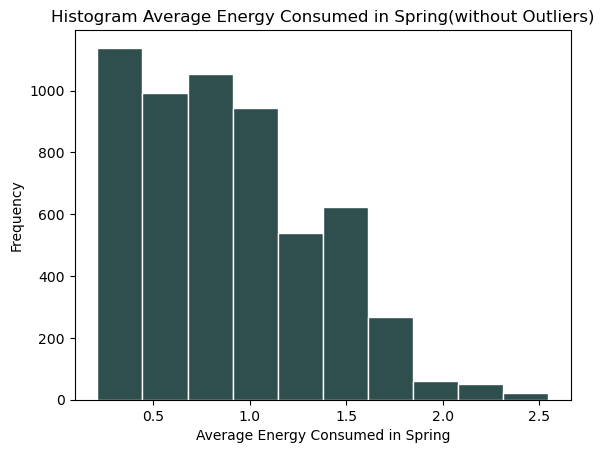

In [37]:
# Calling the function to calculate and print the Summary Statistics of Energy consumption data for spring season
Calc_SummaryStats(spring_energy, "Spring Energy Consumption", "house_overall")
Histogram(spring_energy, "house_overall", "Average Energy Consumed in Spring", outliers = False)

__Interpretation:__

The above histogram of overall energy consumed in Spring season shows a positive skewness in the data point distribution, meaning, the mean is slightly higher than the median value (Mean: 0.890, Median: 0.826) and the central tendency of dataset is on the lower end of positive values. The value of model indicates that 0.325 appears most often in the dataset. Meaning the overall house energy consumption in spring has more frequently been about 0.325KW per day. For this data being filtered for only spring season i.e from March to May, the minimum daily energy consumption recorded was 0.209KW with a max record of 2.548 KW which is after removing the outliers. 

%%latex
\newpage

Summary Statistics of house_overall in Summer Energy Consumption: 
 Central Tendancy: 
 Mean: 0.8585898214285714
 Median: 0.7705
 Mode: 0.367
Measures of Variablity: 
 Variance: 0.2137189633606826
 Standard Deviation: 0.4622974836192412
Measures of Spread: 
 Smallest value: 0.208
 Largest value: 2.549
 First Quartile: 0.454
 Third Quartile: 1.16525
 Inter Quartile range: 0.7112499999999999
 Lower Whisker: -0.6128750000000001, Upper Whisker: 2.232125 


The Summary statistics of house_overall: 
count    5600.000000
mean        0.858590
std         0.462339
min         0.208000
25%         0.454000
50%         0.770500
75%         1.165250
max         2.549000
Name: house_overall, dtype: float64


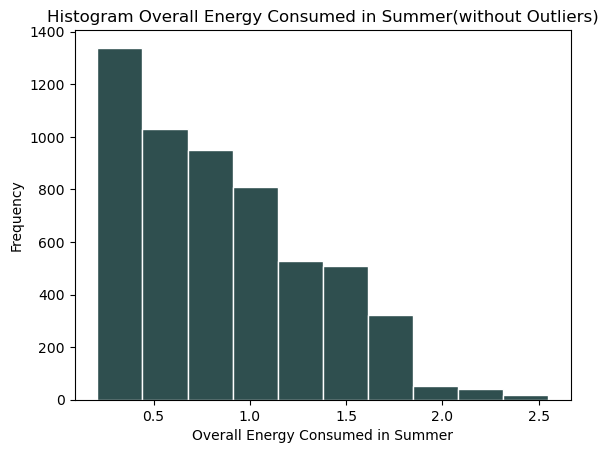

In [38]:
# Calling the function to calculate and print the Summary Statistics of Energy consumption data for summer season
Calc_SummaryStats(summer_energy, "Summer Energy Consumption", "house_overall")
Histogram(summer_energy, "house_overall", "Overall Energy Consumed in Summer", outliers = False)

__Interpretation:__

The above histogram of overall energy consumed in Summer season shows a positive skewness in the data point distribution, nevertheless, their mean and median values (Mean: 0.858, Median: 0.770) does not have significant difference and the central tendency of dataset is on the lower end of positive values. The value of model indicates that 0.367 appears most often in the dataset. Meaning the overall house energy consumption in summer has more frequently been about 0.367KW per day. For this data being filtered for only spring season i.e from June to August, the minimum daily energy consumption recorded was 0.208KW with a max record of 2.549 KW which is after removing the outliers.

Summary Statistics of house_overall in Autumn Energy Consumption: 
 Central Tendancy: 
 Mean: 0.9455048507462687
 Median: 0.882
 Mode: 0.758
Measures of Variablity: 
 Variance: 0.19987250930482953
 Standard Deviation: 0.44707103384678093
Measures of Spread: 
 Smallest value: 0.211
 Largest value: 2.542
 First Quartile: 0.558
 Third Quartile: 1.25725
 Inter Quartile range: 0.6992499999999999
 Lower Whisker: -0.49087499999999973, Upper Whisker: 2.3061249999999998 


The Summary statistics of house_overall: 
count    5360.000000
mean        0.945505
std         0.447113
min         0.211000
25%         0.558000
50%         0.882000
75%         1.257250
max         2.542000
Name: house_overall, dtype: float64


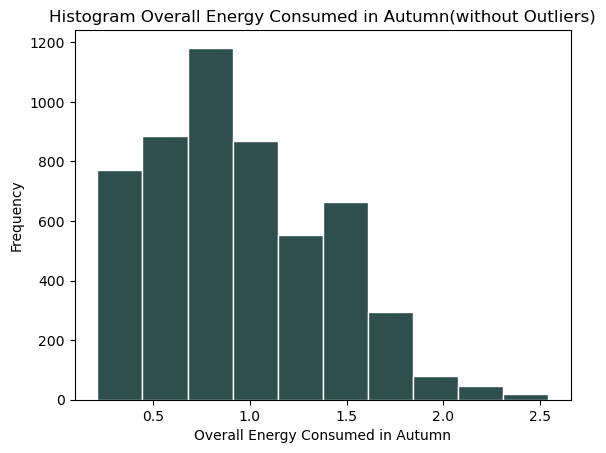

In [39]:
# Calling the function to calculate and print the Summary Statistics of Energy consumption data for fall/autumn season
Calc_SummaryStats(fall_energy, "Autumn Energy Consumption", "house_overall")
Histogram(fall_energy, "house_overall", "Overall Energy Consumed in Autumn", outliers = False)

__Interpretation:__

The above histogram of overall energy consumed in Fall/Autumn season shows a positive skewness in the data point distribution, nevertheless, their mean and median values (Mean: 0.945, Median: Median: 0.882) does not have significant difference and the central tendency of dataset is on the lower end of positive values. The value of model indicates that 0.758 appears most often in the dataset. Meaning the overall house energy consumption in fall has more frequently been about 0.758KW per day. For this data being filtered for only spring season i.e from September to November, the minimum daily energy consumption recorded was 0.211KW with a max record of 2.542 KW which is after removing the outliers.

Summary Statistics of house_overall in Winter Energy Consumption: 
 Central Tendancy: 
 Mean: 0.8845630965005302
 Median: 0.823
 Mode: 0.755
Measures of Variablity: 
 Variance: 0.20230222162858894
 Standard Deviation: 0.4497801925703142
Measures of Spread: 
 Smallest value: 0.207
 Largest value: 2.54
 First Quartile: 0.487
 Third Quartile: 1.18175
 Inter Quartile range: 0.6947500000000001
 Lower Whisker: -0.5551250000000002, Upper Whisker: 2.2238750000000005 


The Summary statistics of house_overall: 
count    5658.000000
mean        0.884563
std         0.449820
min         0.207000
25%         0.487000
50%         0.823000
75%         1.181750
max         2.540000
Name: house_overall, dtype: float64


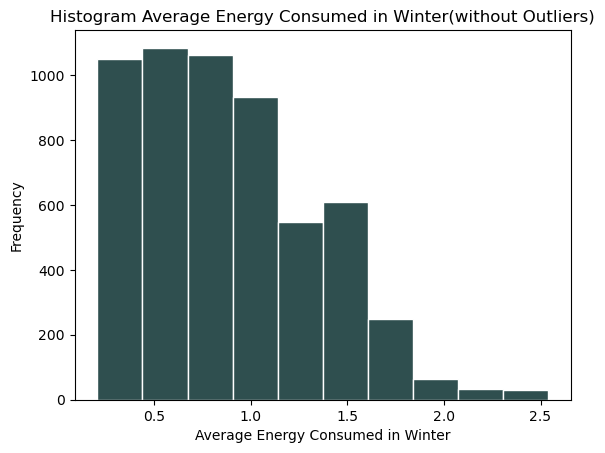

In [40]:
# Calling the function to calculate and print the Summary Statistics of Energy consumption data for winter season
Calc_SummaryStats(winter_energy, "Winter Energy Consumption", "house_overall")
Histogram(winter_energy, "house_overall", "Average Energy Consumed in Winter", outliers = False)

__Interpretation:__

The above histogram of overall energy consumed in Winter season shows a positive skewness in the data point distribution, nevertheless, their mean and median values (Mean: 0.884, Median: Median: 0.823) does not have significant difference and the central tendency of dataset is on the lower end of positive values. The value of model indicates that 0.758 appears most often in the dataset. Meaning the overall house energy consumption in winter has more frequently been about 0.758KW per day. For this data being filtered for only spring season i.e from December to February, the minimum daily energy consumption recorded was 0.211KW with a max record of 2.542 KW which is after removing the outliers.

%%latex
\newpage

__Summary Statistics for Seasonal Energy Generation__

Summary Statistics of solar in Energy Generation: 
 Central Tendancy: 
 Mean: 0.007571834574213498
 Median: 0.003266667
 Mode: 0.003383333
Measures of Variablity: 
 Variance: 0.00020408309582447173
 Standard Deviation: 0.014285765496621864
Measures of Spread: 
 Smallest value: 0.0
 Largest value: 0.0828
 First Quartile: 0.003016667
 Third Quartile: 0.003416667
 Inter Quartile range: 0.0004000000000000002
 Lower Whisker: 0.0024166669999999995, Upper Whisker: 0.004016667 


The Summary statistics of solar: 
count    22314.000000
mean         0.007572
std          0.014286
min          0.000000
25%          0.003017
50%          0.003267
75%          0.003417
max          0.082800
Name: solar, dtype: float64


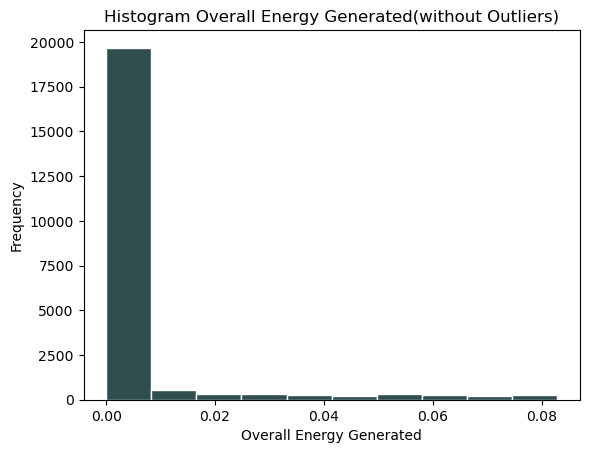

In [41]:
# Calling the function to calculate and print the Summary Statistics of Energy generation data for spring season
Calc_SummaryStats(energy_df, "Energy Generation", "solar")
Histogram(energy_df, "solar", "Overall Energy Generated", outliers = False)

__Interpretation from solar generation histograms:__

The above histograms of overall energy generated shows a random data point distribution witha single tail on the left, making their mean and median values (Mean: 0.00757, Median: Median: 0.00326) have significant differences and the central tendency of dataset is on the lower end of positive values. The value of mode indicates that 0.00338 appears most often in the dataset. Meaning the overall house energy generation has more frequently been about 0.00338KW per day. The minimum daily energy consumption recorded was 0KW with a max record of 0.0828 KW which is after removing the outliers. In comparison with energy consmption the generation rate is very very low.

%%latex
\newpage

__Comparing energy generation and consumption data for different seasons using Cohen's Effect d__

In [42]:
# Calculating Cohen's d for summer and winter energy consumption
consumption_CD1 = calc_CohensEffect(summer_energy.house_overall, winter_energy.house_overall)
print(f"The Cohen's d for Summer and Winter Energy Consumption = {consumption_CD1}")

The Cohen's d for Summer and Winter Energy Consumption = -0.05694768929633162


In [43]:
# Calculating Cohen's d for spring and autumn energy consumption
consumption_CD2 = calc_CohensEffect(spring_energy.house_overall, fall_energy.house_overall)
print(f"The Cohen's d for Spring and Fall/Autumn Energy Consumption = {consumption_CD2}")

The Cohen's d for Spring and Fall/Autumn Energy Consumption = -0.12085320748154822


In [44]:
# Calculating Cohen's d for summer and winter energy generation
generation_CD1 = calc_CohensEffect(summer_energy.solar, winter_energy.solar)
print(f"The Cohen's d for Summer and Winter Energy Generation = {generation_CD1}")

The Cohen's d for Summer and Winter Energy Generation = 0.06057080571922616


In [45]:
# Calculating Cohen's d for spring and autumn energy generation
generation_CD2 = calc_CohensEffect(spring_energy.solar, fall_energy.solar)
print(f"The Cohen's d for Spring and Fall/Autumn Generation = {generation_CD2}")

The Cohen's d for Spring and Fall/Autumn Generation = 0.15716303098902015


In [46]:
# Calculating Cohen's d for energy consumption on weekdays and on weekends
consumption_CD3 = calc_CohensEffect(weekdays_df1.house_overall, weekends_df1.house_overall)
print(f"The Cohen's d for energy consumption on weekdays and on weekends = {consumption_CD3}")

The Cohen's d for energy consumption on weekdays and on weekends = 0.009373163702746296


__Interpretation:__

The results from the cohen's effect d indicate that the energy consumption is lesser in summer and also in spring this is may the fact that the in fall and in winter the furnace consumes more energy for space heating needs alternatively Air conditioning in spring and summer draws more power causing more energy consumption in summer and spring than in fall or winter.

Surprisingly the Cohen's d value for energy consumed on weekdays and on weekends is negligibly small meaning the energy consumption on weekends is almost as same as energy consumed on weekdays.

%%latex
\newpage

## Question 5 

__Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).__

In this section we will first subset our sesonal datasets into day of the week data so that we can study the energy pattern between the days of the week i.e Weekdays vs Weekends by calculating and plotting their Histograms and PMFs.

The functions used in this section are:

* def calc_PMF: Calculates the Probability Mass Function of two subsets of data groups
* def plot_Hists: Plots the histograms of calculates PMFS of given datasets
* def plot_PMF: Plots the PMF of given datasets

In [47]:
# Creating a function to calculate the PMF of two subsets of a single dataframe
# It takes two dataframes derived from one original dataset, a data field and returns the pmf of two quantities
# round flag will round off values if enabled
def calc_PMF(df1, df2, var, label1, label2, round_flag = False):

    if round_flag:
        pmf1 = thinkstats2.Pmf(round(df1[var]), label = label1)
        pmf2 = thinkstats2.Pmf(round(df2[var]), label = label2)
    else:
        pmf1 = thinkstats2.Pmf(df1[var], label = label1)
        pmf2 = thinkstats2.Pmf(df2[var], label = label2)
    return pmf1, pmf2

In [48]:
# Creating a function to plot the histogram of PMF 
# It takes the pmfs to be plotted and the plot configurations and returns a Histogram
def plot_Hists(pmf1, pmf2, axis = None, xlabel = None, ylabel = None, title = None):

    thinkplot.PrePlot(2, cols = 2)
    width = 0.00085
    thinkplot.Hist(pmf1, align = "right", width = width)
    thinkplot.Hist(pmf2, align = "left", width = width)
    thinkplot.Config(xlabel = xlabel, ylabel = ylabel,
                     title = title, align = "right", axis = axis)

%%latex
\newpage

In [49]:
# Creating a function to plot the calculate PMF of the variables
# It takes two pmfs and plot configurations and returns a PMF plot
def plot_PMF(pmf1, pmf2, axis = None, xlabel = None, ylabel = None, title = None, linewidth = None):

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([pmf1, pmf2])   
    thinkplot.Config(xlabel = xlabel, ylabel = ylabel, 
                     title = title, align = "right", axis = axis)

__Studying Weekdays and Weekends of a year or of a season with PMF Plot__

One of our question is to study our energy consumption trend during weekdays and on weekends, the analysis of pmfs of data calculated for weekdays & Weekends can help provide valuable insights on how we consumed energy based of days of a week. The results can also help us understand whether change in pattern of energy consumption on weekdays and on weekends means majority of residents on a home are employed and work from office during weekdays, the increase in energy usage activity can be a result of increased house chores during weekends.

In [50]:
# Calling the function to calculate the pmfs of two subgroups
weekdays_pmf1, weekends_pmf1 = calc_PMF(weekdays_df1, weekends_df1, "house_overall",
                                      "Overall Energy consumption on weekdays", "Overall Energy consumptio on weekends")

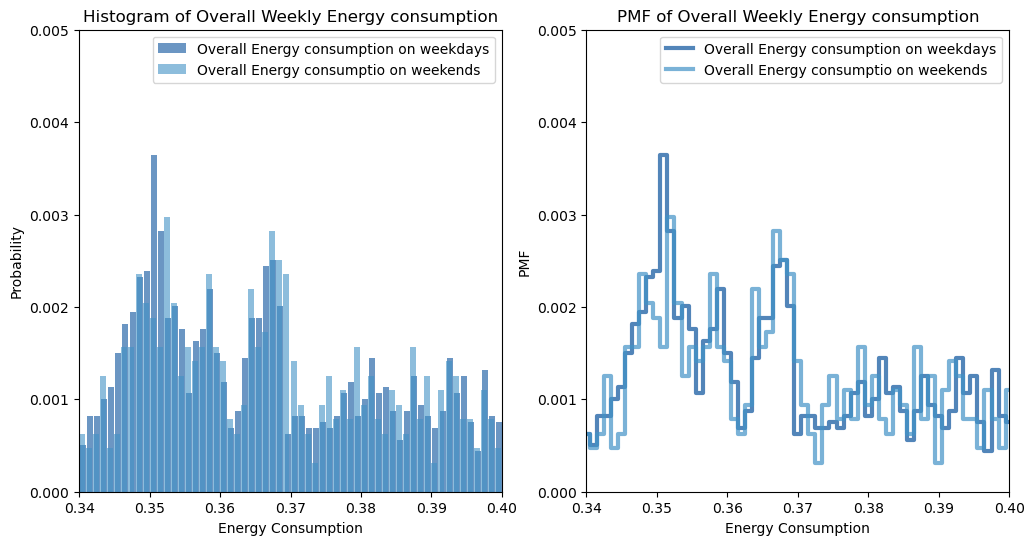

In [51]:
# Plotting the results of pmfs and histograms of weekdays energy consumption and weekends energy consumption
plot_Hists(weekdays_pmf1, weekends_pmf1, 
           xlabel = "Energy Consumption", ylabel = "Probability", axis = [0.34, 0.40, 0, 0.005],
           title = "Histogram of Overall Weekly Energy consumption")
plot_PMF(weekdays_pmf1, weekends_pmf1, 
         xlabel = "Energy Consumption", ylabel = "PMF", axis = [0.34, 0.40, 0, 0.005],
         title = "PMF of Overall Weekly Energy consumption")

In [52]:
# Creating  weekdays & Weekends energy consumption dataframes by applying filters in energy df
spring_weekdays_df = spring_energy[spring_energy["weekday"].isin(['Saturday', 'Sunday'])== False]
summer_weekdays_df = summer_energy[summer_energy["weekday"].isin(['Saturday', 'Sunday'])== False]
fall_weekdays_df = fall_energy[fall_energy["weekday"].isin(['Saturday', 'Sunday'])== False]
winter_weekdays_df = winter_energy[winter_energy["weekday"].isin(['Saturday', 'Sunday'])== False]

spring_weekends_df = spring_energy[spring_energy["weekday"].isin(['Saturday', 'Sunday'])]
summer_weekends_df = summer_energy[summer_energy["weekday"].isin(['Saturday', 'Sunday'])]
fall_weekends_df = fall_energy[fall_energy["weekday"].isin(['Saturday', 'Sunday'])]
winter_weekends_df = winter_energy[winter_energy["weekday"].isin(['Saturday', 'Sunday'])]

%%latex
\newpage

In [53]:
# Calling the function to calculate the pmfs of two subgroups of spring dataframe
spring_weekdays_pmf, spring_weekends_pmf = calc_PMF(spring_weekdays_df, spring_weekends_df, "house_overall",
                                                    "Overall Energy consumption on weekdays in Spring",
                                                    "Overall Energy consumptio on weekends in Spring")

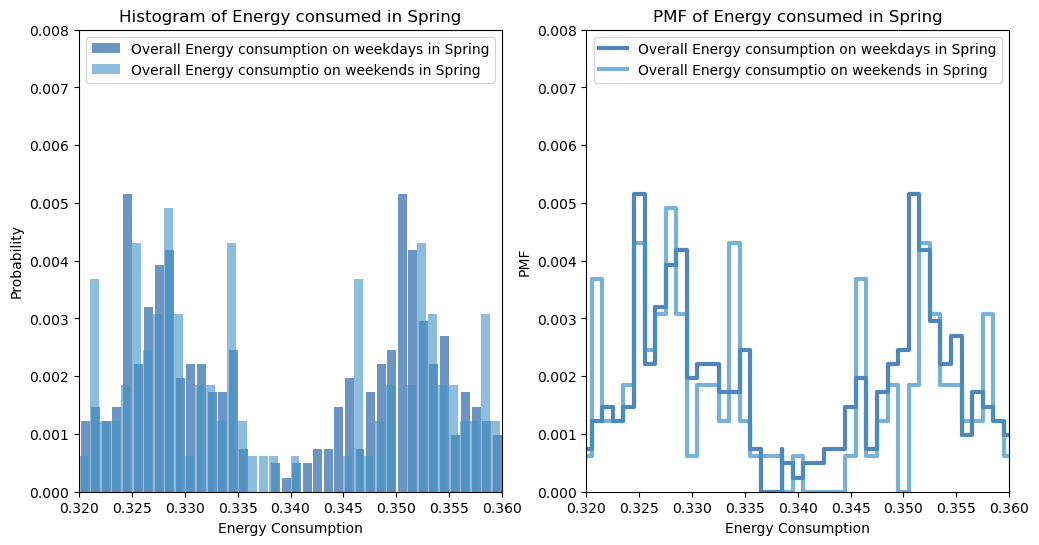

In [54]:
# Plotting the results of pmfs and histograms of weekdays energy consumption and weekends energy consumption in Spring
plot_Hists(spring_weekdays_pmf, spring_weekends_pmf,
           xlabel = "Energy Consumption", ylabel = "Probability", axis = [0.32, 0.36, 0, 0.008], 
           title = "Histogram of Energy consumed in Spring")
plot_PMF(spring_weekdays_pmf, spring_weekends_pmf,
         xlabel = "Energy Consumption", ylabel = "PMF", axis = [0.32, 0.36, 0, 0.008],
         title = "PMF of Energy consumed in Spring")

%%latex
\newpage

In [55]:
# Calling the function to calculate the pmfs of two subgroups of summer dataframe
summer_weekdays_pmf, summer_weekends_pmf = calc_PMF(summer_weekdays_df, summer_weekends_df, "house_overall",
                                                    "Overall Energy consumption on weekdays in Summer",
                                                    "Overall Energy consumptio on weekends in Summer")

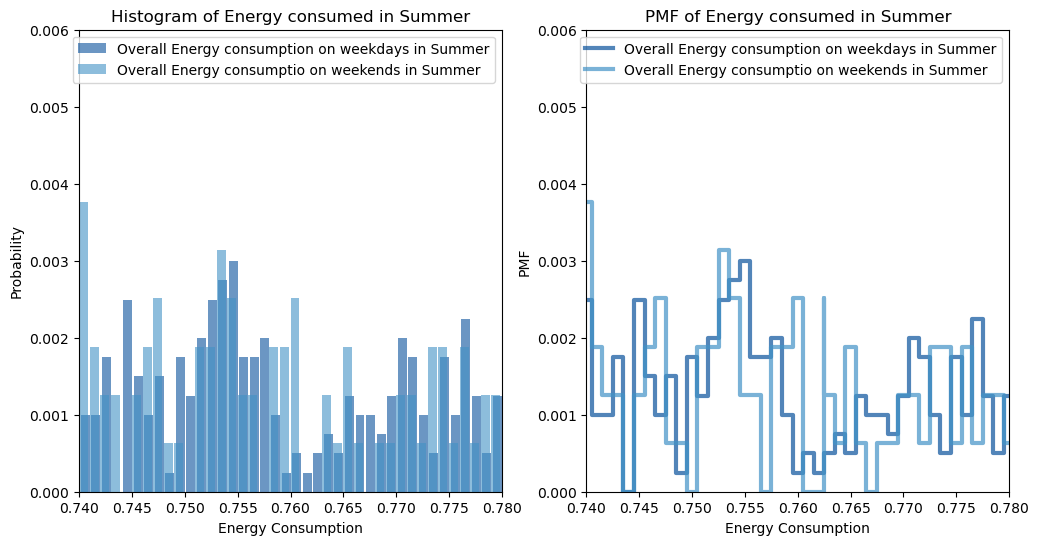

In [56]:
# Plotting the results of pmfs and histograms of weekdays energy consumption and weekends energy consumption in Spring
plot_Hists(summer_weekdays_pmf, summer_weekends_pmf, axis = [0.74, 0.78, 0, 0.006],
           xlabel = "Energy Consumption", ylabel = "Probability", 
           title = "Histogram of Energy consumed in Summer")
plot_PMF(summer_weekdays_pmf, summer_weekends_pmf,
         xlabel = "Energy Consumption", ylabel = "PMF", axis = [0.74, 0.78, 0, 0.006],
         title = "PMF of Energy consumed in Summer")

%%latex
\newpage

In [57]:
# Calling the function to calculate the pmfs of two subgroups of summer dataframe
fall_weekdays_pmf, fall_weekends_pmf = calc_PMF(fall_weekdays_df, fall_weekends_df, "house_overall",
                                                    "Overall Energy consumption on weekdays in Fall/Autumn",
                                                    "Overall Energy consumptio on weekends in Fall/Autumn")

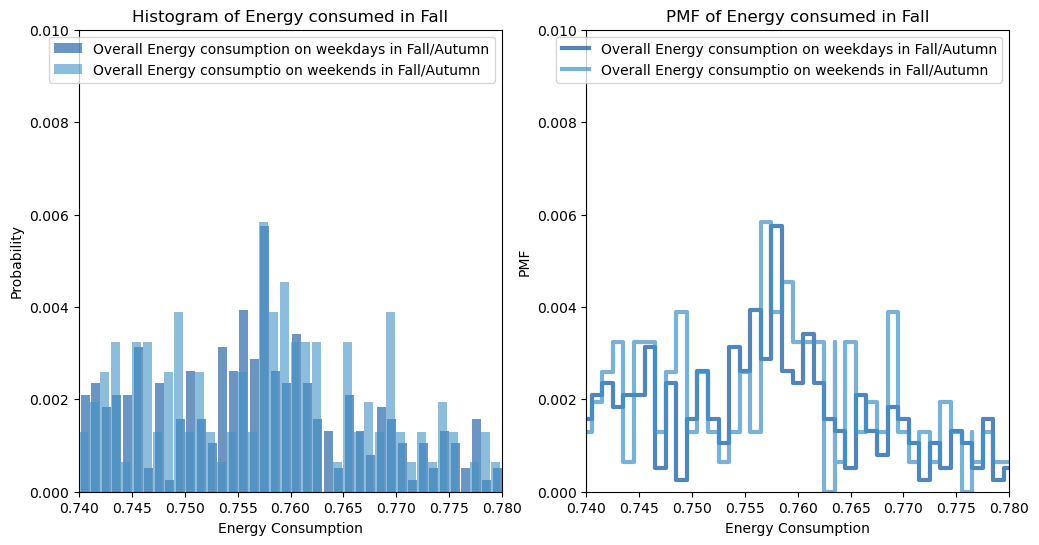

In [58]:
# Plotting the results of pmfs and histograms of weekdays energy consumption and weekends energy consumption in Spring
plot_Hists(fall_weekdays_pmf, fall_weekends_pmf,
           xlabel = "Energy Consumption", ylabel = "Probability", axis = [0.74, 0.78, 0, 0.010],
           title = "Histogram of Energy consumed in Fall")
plot_PMF(fall_weekdays_pmf, fall_weekends_pmf,
         xlabel = "Energy Consumption", ylabel = "PMF", axis = [0.74, 0.78, 0, 0.010],
         title = "PMF of Energy consumed in Fall")

%%latex
\newpage

In [59]:
# Calling the function to calculate the pmfs of two subgroups of summer dataframe
winter_weekdays_pmf, winter_weekends_pmf = calc_PMF(winter_weekdays_df, winter_weekends_df, "house_overall",
                                                    "Overall Energy consumption on weekdays in Winter",
                                                    "Overall Energy consumptio on weekends in Winter")

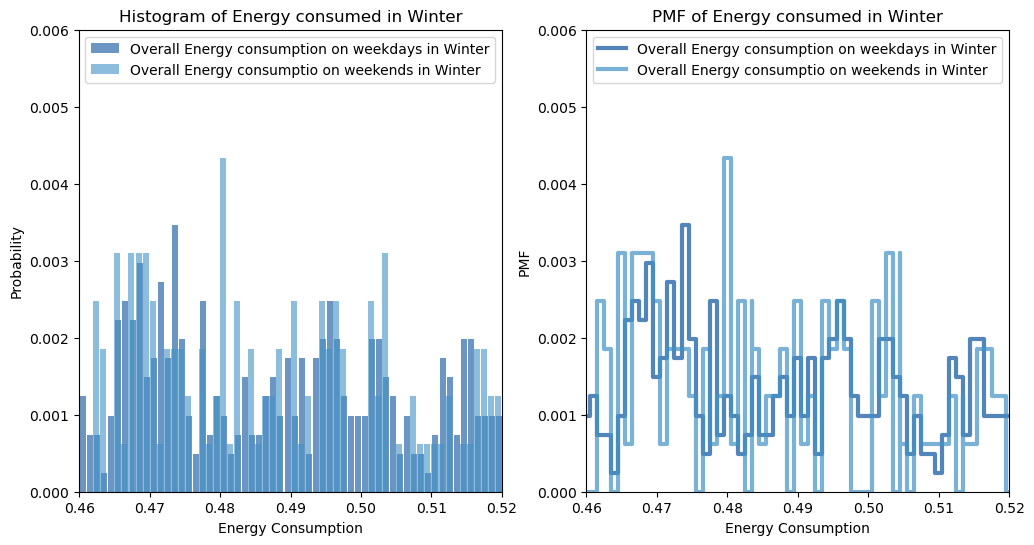

In [60]:
# Plotting the results of pmfs and histograms of weekdays energy consumption and weekends energy consumption in Spring
plot_Hists(winter_weekdays_pmf, winter_weekends_pmf,
           xlabel = "Energy Consumption", ylabel = "Probability", axis = [0.46, 0.52, 0, 0.006],
           title = "Histogram of Energy consumed in Winter")
plot_PMF(winter_weekdays_pmf, winter_weekends_pmf,
         xlabel = "Energy Consumption", ylabel = "PMF", axis = [0.46, 0.52, 0, 0.006],
         title = "PMF of Energy consumed in Winter")

__Interpretion for the PMFs Plot:__

The histogram of probability distribution and probability mass function distribution can be studied from the above results. Here, we have plotted energy consumption pattern for weekdays and on weekednds for all four seasons. The histogram shows that the data points almost coinside for, this unique pattern can be clearly studied with the probability mass function plot. This section helps understand and consolidate our findings abut energy consumption pattern on  days of a week more thoroughly.

%%latex
\newpage

## Question 6:

__Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4)__

In [61]:
# Creating a function to calculate the CDF of two dataframes
# It takes to dataframes and a common datafield and calculates its cdf and returns labelled value using label input
def calc_cdf(df1, df2, var, label1, label2):

    cdf1 = thinkstats2.Cdf(df1[var], label = label1)
    cdf2 = thinkstats2.Cdf(df2[var], label = label2)
    return cdf1, cdf2   

In [62]:
# Creating a function to plot the CDF calculated above
# It takes the CDF and plots the datapoints with plot configurations using thinkplot module
def plot_cdf(cdf1, cdf2, xlabel, title):

    thinkplot.PrePlot(2)
    thinkplot.Cdfs([cdf1, cdf2])
    thinkplot.Config(xlabel = xlabel, ylabel = "CDF", title = title)

0.77 0.823


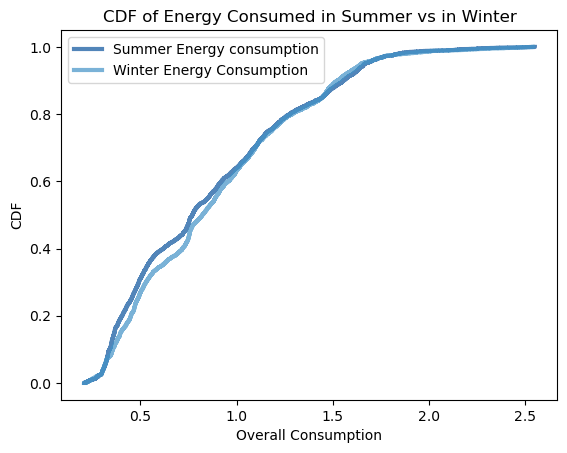

In [63]:
# Calling the function to calculate and compare the CDF of Summer & Winter energy consumption
summerCon_cdf, winterCon_cdf = calc_cdf(summer_energy, winter_energy, "house_overall", 
                                  label1 = "Summer Energy consumption", label2 = "Winter Energy Consumption")
print(summerCon_cdf.Percentile(50), winterCon_cdf.Percentile(50))
plot_cdf(summerCon_cdf, winterCon_cdf, xlabel = "Overall Consumption", 
         title = "CDF of Energy Consumed in Summer vs in Winter")

__Interpretation:__

The CDF plot of overall energy consumed in summer vs in winter is as shown above. The plot indicates that the energy consumption in summer is slightly higher than in winter and difference in values reaches to saturation at about 2KW this eefect is due to the space heating and cooling needs throughout the year. 

%%latex
\newpage

0.829 0.818


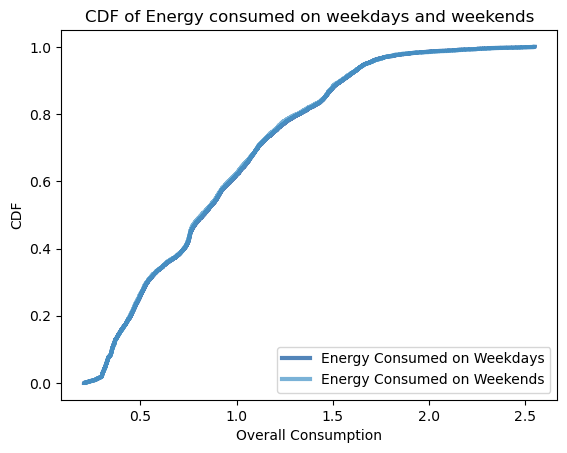

In [64]:
# Calling the function to calculate and compare the CDF of energy consumption on weekdays and weekends
weekdaysCon_cdf1, weekendsCon_cdf1 = calc_cdf(weekdays_df1, weekends_df1, "house_overall", 
                                  label1 = "Energy Consumed on Weekdays", label2 = "Energy Consumed on Weekends")
print(weekdaysCon_cdf1.Percentile(50), weekendsCon_cdf1.Percentile(50))
plot_cdf(weekdaysCon_cdf1, weekendsCon_cdf1, xlabel = "Overall Consumption", 
         title = "CDF of Energy consumed on weekdays and weekends")

__Interpretation:__

The CDF plot of overall energy consumed on weekdays vs on weekends is as shown above. Surprisingy, the plot indicates that the energy consumption on weekdays and on weekends closely follow each other. Meaning energy consumption from Monday to friday is almost equal to the sum of Satureday and Sunday. This is interesting finding We can further study which appianes can cause and follow similar energy needs.

%%latex
\newpage

0.003183333 0.0033


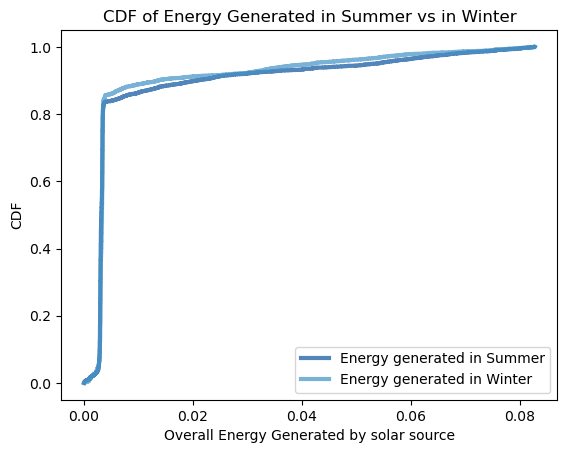

In [65]:
# Calling the function to calculate and compare the CDF of Summer & Winter energy generation
summerGen_cdf, winterGen_cdf = calc_cdf(summer_energy, winter_energy, "solar", 
                                  label1 = "Energy generated in Summer", label2 = "Energy generated in Winter")
print(summerGen_cdf.Percentile(50), winterGen_cdf.Percentile(50))
plot_cdf(summerGen_cdf, winterGen_cdf, xlabel = "Overall Energy Generated by solar source", 
         title = "CDF of Energy Generated in Summer vs in Winter")

__Interpretation:__

The CDF plot of overall energy generated in summer vs in winter is as shown above. The plot indicates that the energy generation in winter is slightly higher than in summer and difference, the effect of cloud cover impacta the overall energy generation meaning on days when energy generation was lesses in summer can be a result of overcast.

%%latex
\newpage

## Question 7 

__Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5)__

In [66]:
# Creating a function to calculate the covariance of two variables
# It takes arrays of two variables checks their mean-calculates if not given and return the covariance
def calc_Cov(xs, ys, meanx = None, meany = None):

    # Coverting the input value into an array 
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    # Checking if mean is given else calculates the Means and returns the covariance
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    Cov = np.dot(xs - meanx, ys - meany) / len(xs)
    
    return Cov

# Creating a function that uses Least Squares method to calculate the slope_xy of the linear relationship between two variables
# It takes array of two variables and returns their slope_xy and intercept
def Calc_Least_Squares(xs_array, ys_array):

    # Calculating the Mean and variance of the sequences
    mean_xs, var_xs = MeanVar(xs_array)
    mean_ys = Mean(ys_array)
    # calling the calc_Cov to Calculating the slope_xy as a division of the Covariance of two variables to the variance of x
    slope_xy = calc_Cov(xs_array, ys_array, mean_xs, mean_ys) / var_xs
    # Calculating the Intercept as ys = Intercept + (xs*slope_xy)
    intercept = mean_ys - slope_xy * mean_xs
    
    return intercept, slope_xy

# Creating a function that evaluates the fitted line at the given xs (x and y coordinates to fit a line on a plot)
# It takes the sequence of x, slope_xy, and inercept and retruns the sequnce y incordinance with x
def Fitted_Line(xs, inter, slope_xy):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope_xy * fit_xs
    return fit_xs, fit_ys

# Creating a function that calculates the variance of series of values.
# It takes xs as value series, mean, delta degree of freedom and returns the covariance
def calc_Var(xs, mu = None, ddof = 0):

    xs = np.asarray(xs)
    if mu is None:
        mu = xs.mean()
    ds = xs - mu
    return np.dot(ds, ds) / (len(xs) - ddof)


In [67]:
# Creating a function to trimm off the fraction of smallest and largest elements of input sequence
# It takes input sequence and the fraction of value to be trimmed off and return a sorted result 
def Trim(t, p = 0.01):

    n = int(p * len(t))
    t = sorted(t)[n:-n]
    return t

# Creating a function to calculate the mean of input data series and returns the variance by 
# calling the respective function
# It takes input series and delta degrees of freedom(ddof) as input and returns mean and variance of value sequence
def calc_MeanVar(xs, ddof = 0):

    xs = np.asarray(xs)
    mean = xs.mean()
    s2 = calc_Var(xs, mean, ddof)
    return mean, s2

# Creating a function to compute the trimmed vmean and variance of input series
# It takes the value sequence and fraction of value to be trimmed off(p) and returns the mean(mu) and variance
def calc_TrimmedMeanVar(t, p = 0.01):

    t = Trim(t, p)
    mu, var = calc_MeanVar(t)
    return mu, var

# Creating a function to generate the sequence of xs and ps for Normal CDF Model
# It takes mu, sigma and number of points to render and return san array of xs and ps 
def Render_NormalCdf(mu, sigma, low, high, n = 101):

    xs = np.linspace(low, high, n)
    # Creating a normal cdf distribution
    ps = stats.norm.cdf(xs, mu, sigma)
    return xs, ps

# Creating a funtion to generate data for a normal probability plot
# It takes ys as sequence of values, magnitude of Jitter for ys and returns an array of xs, ys
def Create_NormProbData(ys, jitter=0):

    len_ys = len(ys)
    xs = np.random.normal(0, 1, len_ys)
    xs.sort()
    if jitter:
        ys = Jitter(ys, jitter)
    else:
        ys = np.array(ys)
    ys.sort()
    return xs, ys

In [68]:
# Creating a function to a CDF of a normal model
# It takes input variable and returns its normal CDF model
def Create_NormalModel(input_var):

    cdf = thinkstats2.Cdf(input_var, label = 'Data')
    # Calculating the Mean, Median, Variance and Standard Deviation and printing the output
    print(f"The Median of CDF is {cdf.Percentile(50)}")
    mean, var = calc_TrimmedMeanVar(input_var)
    std = np.sqrt(var)
    median = np.median(input_var)
    print("The Result of Normal CDF Model is: len(input_variable), mean, std, median ", 
          len(input_var), mean, std, median)
    # Calculating the Min, Max bounds of standard deviation & plotting the Normal distribution model
    xmin = mean - 3 * std
    xmax = mean + 3 * std
    xs, ps = Render_NormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label = "Normal Model", linewidth = 4, color = "steelblue")
    # Comparing the distrbution with its CDF Plot 
    thinkplot.Cdf(cdf)

In [69]:
# Creating a function plot normal probability plot
# It takes input sequence and retuns normal probability plot of the input sequence
def Create_NormalPlot(input_var):

    # Calculating the Mean, Variance and standard deviation of input variable
    mean, var = calc_TrimmedMeanVar(input_var, p=0.01)
    std = np.sqrt(var)
    # Plotting the normal probability plot with, X axis limits, line to highlight model
    xs = [-4, 4]
    xs, ys = Fitted_Line(xs, mean, std)
    thinkplot.Plot(xs, ys, color = "darkgray", label = " Probability Model")
    xs, ys = Create_NormProbData(input_var)
    thinkplot.Plot(xs, ys, label = "Data")

The Median of CDF is 0.77
The Result of Normal CDF Model is: len(input_variable), mean, std, median  5600 0.8505840014577262 0.43977312209869246 0.7705


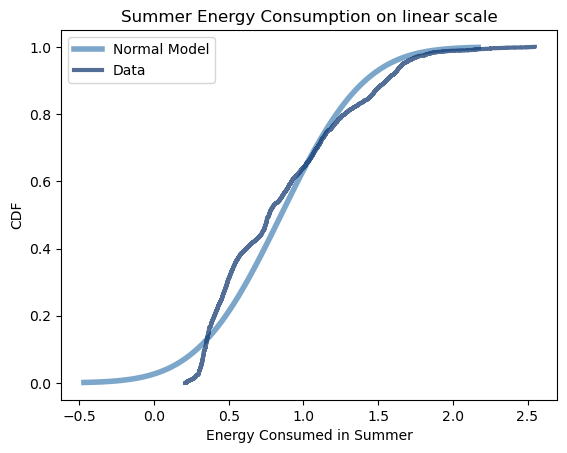

In [70]:
# Creating Normal Model for summer energy consumption
summer_energyCon = summer_energy.house_overall
Create_NormalModel(summer_energyCon)
thinkplot.Config(title = "Summer Energy Consumption on linear scale",
                 xlabel = "Energy Consumed in Summer", ylabel = "CDF",
                 loc = "upper left",)

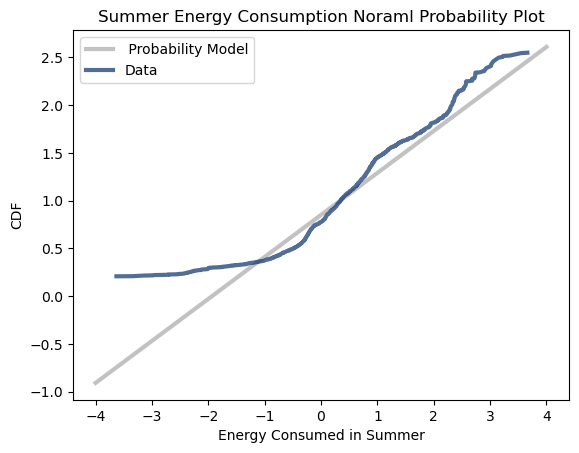

In [71]:
# Creating Normal Probability plot for summer energy consumption
summer_energyCon = summer_energy.house_overall
Create_NormalPlot(summer_energyCon)
thinkplot.Config(title = "Summer Energy Consumption Noraml Probability Plot",
                 xlabel = "Energy Consumed in Summer", ylabel = "CDF",
                 loc = "upper left",)

__Interpretation:__

The resultant graph of data distribution on linear scale indicates deviation from the model meaning sample1 is not a good Normal distribution. 
The resultant graph of normal probability plot indicates deviation from the Normal plot meaning it is not a good Normal distribution.

%%latex
\newpage

The Median of CDF is 0.823
The Result of Normal CDF Model is: len(input_variable), mean, std, median  5658 0.8765838442120446 0.42523978079508623 0.823


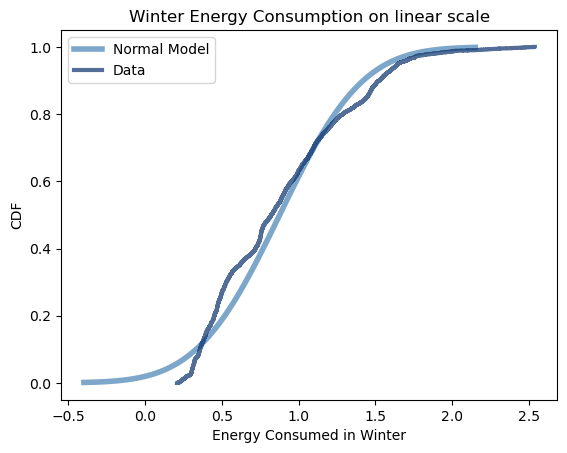

In [72]:
# Calculating the Normal Model for Winter Energy Consumption
winter_energyCon = winter_energy.house_overall
Create_NormalModel(winter_energyCon)
thinkplot.Config(title = "Winter Energy Consumption on linear scale",
                 xlabel = "Energy Consumed in Winter", ylabel = "CDF",
                 loc = "upper left",)

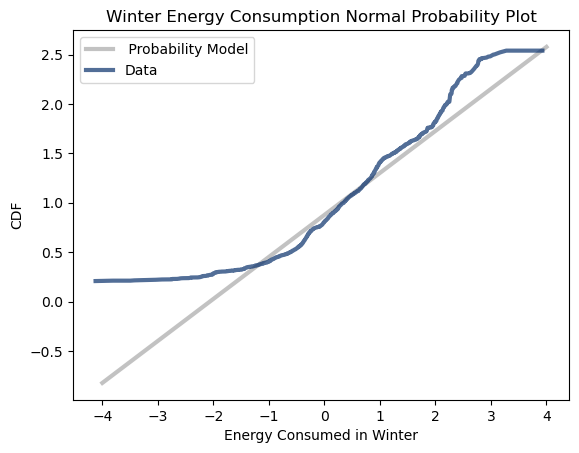

In [73]:
# Creating Normal Probability plot for winter energy consumption
winter_energyCon = winter_energy.house_overall
Create_NormalPlot(winter_energyCon)
thinkplot.Config(title = "Winter Energy Consumption Normal Probability Plot",
                 xlabel = "Energy Consumed in Winter", ylabel = "CDF",
                 loc = "upper left",)

The Median of CDF is 0.829
The Result of Normal CDF Model is: len(input_variable), mean, std, median  15934 0.887941150102459 0.4321804576015599 0.829


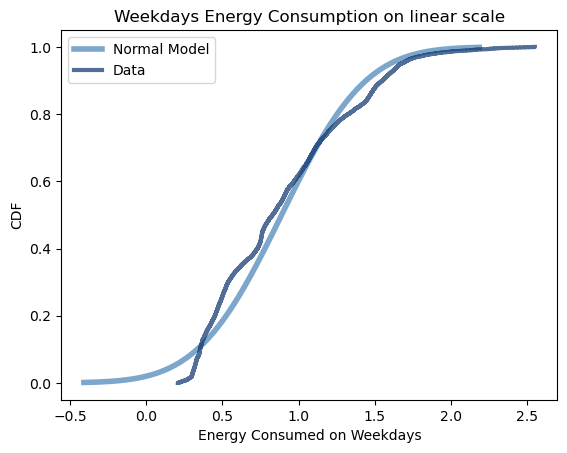

In [74]:
# Calculating the Normal Model for Energy Consumption on Weekdays
weekdays_energyCon2 = weekdays_df1.house_overall
Create_NormalModel(weekdays_energyCon2)
thinkplot.Config(title = "Weekdays Energy Consumption on linear scale",
                 xlabel = "Energy Consumed on Weekdays", ylabel = "CDF",
                 loc = "upper left",)

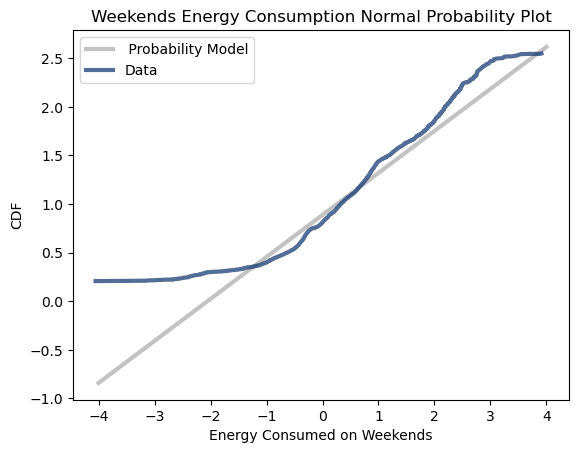

In [75]:
# Creating Normal Probability plot for Energy Consumption on Weekdays
weekends_energyCon2 = weekends_df1.house_overall
Create_NormalPlot(weekdays_energyCon2)
thinkplot.Config(title = "Weekends Energy Consumption Normal Probability Plot",
                 xlabel = "Energy Consumed on Weekends", ylabel = "CDF",
                 loc = "upper left",)

__Interpretation:__

The resultant graph of data distribution on linear scale indicates deviation from the model meaning sample1 is not a good Normal distribution. 
The resultant graph of normal probability plot indicates deviation from the Normal plot meaning it is not a good Normal distribution.

%%latex
\newpage

## Question 8

__Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter7)__

In [76]:
# Creating a fuction to plot a scatterplot of two input variables
# It takes two variables and returns their scatterplot with plot configurations
def create_ScatterPlot(var1, var2, xlabel, ylabel, xlim, ylim, title):

    # calling the Least Squares function to calculate the Intercept and slope of the line 
    inter, slope = thinkstats2.LeastSquares(var1, var2)
    # Calling fitline function to fit plotlines and plotting the Scatter plot
    fxs, fys = thinkstats2.FitLine(var1, inter, slope)
    thinkplot.Scatter(var1, var2, alpha = 0.3, s = 10, color = "darkcyan")
    thinkplot.Plot(fxs, fys, color = 'slategray')
    thinkplot.Config(xlabel = xlabel, ylabel = ylabel, xlim = xlim, ylim = ylim, title = title, legend = True)
    
# Creating a jitter function to add random noise to dataset to avoid overlapping.clustering of datapoints
def Create_Jitter(values, jitter = 0.05):
    # Cheking length of filed and Adding normal values to the original value
    val_len = len(values)
    return np.random.normal(0, jitter, val_len) + values

In [77]:
# Creating a percentile plot to plot the 25, 50 and 75 percentile values for the input variables
# It takes two variables from dataframe and creates a CDF plot with plot cofigurations 
def plot_Percentile(df, var1, var2, bin_low, bin_high, binwidth, xlabel, ylabel, axis, title):

    # Adding incremental binwidth to the plot with low and high values defined
    bins = np.arange(bin_low, bin_high, binwidth)
    # Indexing the bin with given percentile value in df and creating groups
    indices = np.digitize(df[var1], bins)
    groups = df.groupby(indices)
    # For each group in var1 calculating the mean to be plotted on x-axis and Creating CDF of var2 for each group
    mean_var1 = [group[var1].mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group[var2]) for i, group in groups]
    # Plotting the percentile plot for each percentile value of data
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        var2_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(mean_var1, var2_percentiles, label=label)
    thinkplot.Config(xlabel = xlabel,
                     ylabel = ylabel,
                     axis = axis,
                     title = title,
                     legend = True)

In [78]:
# Creating a function to calculate Covariance. 
# It takes the aaray of two variables and their mean as input. 
# Calculates mean if it is not given & then returns covariance

def calc_Cov(xs, ys, meanx = None, meany = None):
    # Converting the input variables to numpy array format and calculating the mean if not given
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    # Calculating the covariance using numpy dot function as a sum of product of difference of means in xs and ys array  
    covariance = np.dot(xs-meanx, ys-meany) / len(xs)
    return covariance

# Creating a function to calculate the Pearson's Correlation
# It takes the aaray of two variables and returns the Correlation between the two series.

def calc_PearsonCorr(xs, ys):
    # Converting the input variables to numpy array format
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    # Calculating the Mean and Variance of the two arrays nand stores the results in new variables respectively
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    # Correlation is a measure of standardized Covariance which is the product of Std deviation of given input series.
    correlation = calc_Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return correlation


# Creating a function to calculate the Spearman Correlation. 
# It takes the aaray of two variables and returns the Spearman correlation between the variables.
# In this method we compute the ranks of each variable and compute the correlation between them.

def calc_SpearmanCorr(xs, ys):
    # Calculates the rank of each variables and creates series of Ranked values respectively
    xrank = pd.Series(xs).rank()
    yrank = pd.Series(ys).rank()
    # Computes the correlation on the Rank series.
    return calc_PearsonCorr(xrank, yrank)

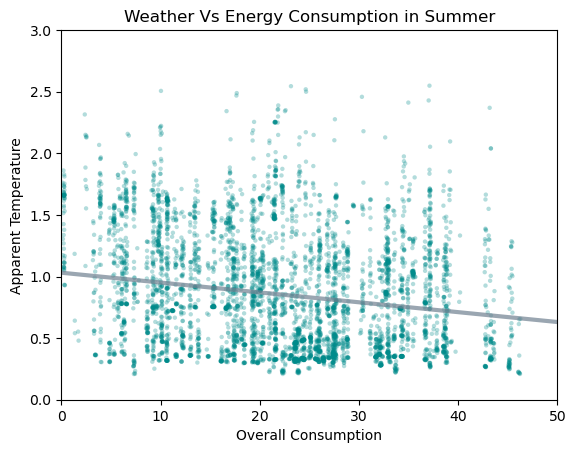

In [79]:
# Scatter plot ofWeather Vs Energy Consumption in Summer
overall_temperature1 = Create_Jitter(summer_energy["apparent_temperature"], 0.05)
overall_energy1 = Create_Jitter(summer_energy["house_overall"], 0.0015)
create_ScatterPlot(overall_temperature1, overall_energy1, xlabel = "Overall Consumption", ylabel = "Apparent Temperature",
                   xlim = [0, 50], ylim = [0, 3], title = "Weather Vs Energy Consumption in Summer")

__Interpretation:__

The plot indicates a stronger linear relationship between energy consumption and apparent temperature in summer, meaning their correlation coefficients closer to -1 and +1 and thier regression models will have higher R-squared values.

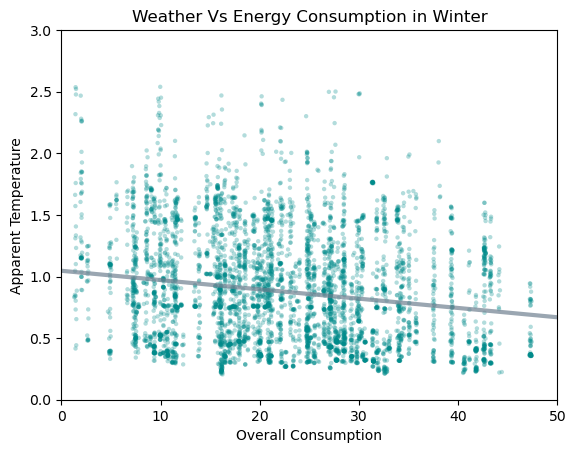

In [80]:
# Scatter plot of Weather Vs Energy Consumption in Winter
overall_temperature2 = Create_Jitter(winter_energy["apparent_temperature"], 0.05)
overall_energy2 = Create_Jitter(winter_energy["house_overall"], 0.0015)
create_ScatterPlot(overall_temperature2, overall_energy2, xlabel = "Overall Consumption", ylabel = "Apparent Temperature",
                   xlim = [0,50], ylim =  [0,3] , title = "Weather Vs Energy Consumption in Winter")

__Interpretation:__

The plot indicates a stronger linear relationship between energy consumption and apparent temperature in winter, meaning their correlation coefficients closer to -1 and +1 and thier regression models will have higher R-squared values.

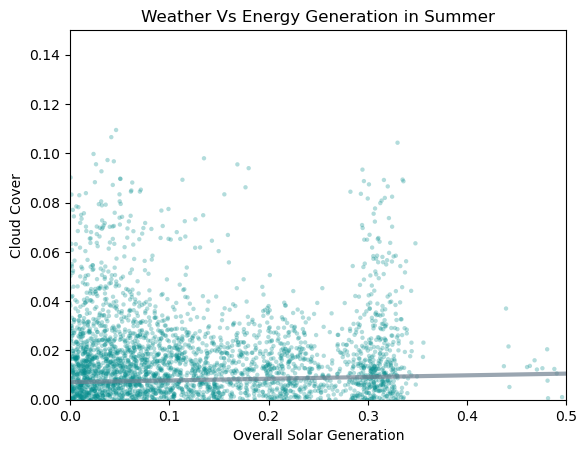

In [81]:
# Scatter plot of Weather Vs Energy generation in Summer
cloud_cover1 = Create_Jitter(summer_energy["cloud_cover"], 0.015)
overall_energygen1 = Create_Jitter(summer_energy["solar"], 0.015)
create_ScatterPlot(cloud_cover1, overall_energygen1, xlabel = "Overall Solar Generation", ylabel = "Cloud Cover",
                   xlim = [0, 0.5], ylim =  [0, 0.15] , title = "Weather Vs Energy Generation in Summer")

__Interpretation:__

The plot indicates a stronger linear relationship between energy consumption and apparent temperature in winter, meaning their correlation coefficients closer to -1 and +1 and thier regression models will have higher R-squared values.

%%latex
\newpage

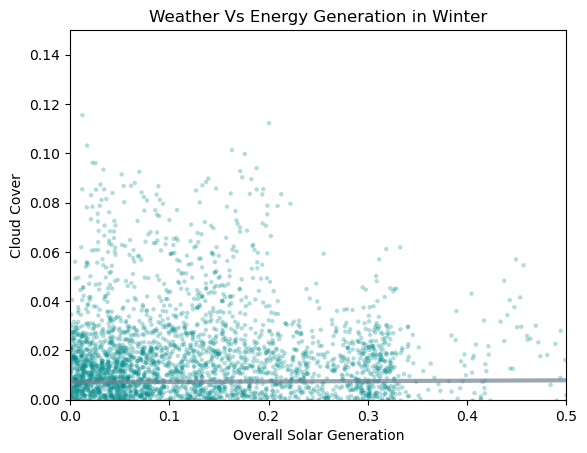

In [82]:
# Scatter plot of Weather Vs Energy generation in Winter
cloud_cover2 = Create_Jitter(winter_energy["cloud_cover"], 0.015)
overall_energygen2 = Create_Jitter(winter_energy["solar"], 0.015)
create_ScatterPlot(cloud_cover2, overall_energygen2, xlabel = "Overall Solar Generation", ylabel = "Cloud Cover",
                   xlim = [0, 0.5], ylim =  [0, 0.15] , title = "Weather Vs Energy Generation in Winter")

__Interpretation:__

The plot indicates a stronger linear relationship between energy consumption and apparent temperature in winter, meaning their correlation coefficients closer to -1 and +1 and thier regression models will have higher R-squared values.

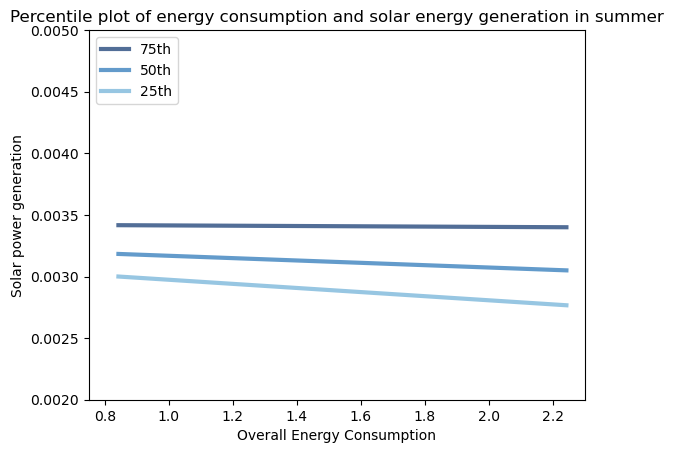

In [83]:
# Percentile plot of energy consumption and solar energy generation in summer
plot_Percentile(summer_energy, var1 = 'house_overall', var2 = 'solar', bin_low = 2, bin_high = 8, binwidth = 10, 
                xlabel = "Overall Energy Consumption", ylabel = "Solar power generation",
                title = "Percentile plot of energy consumption and solar energy generation in summer", axis = [0.75, 2.3, 0.002, 0.005])

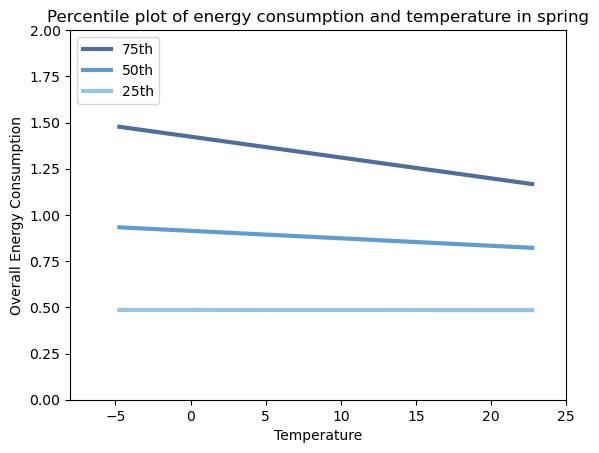

In [84]:
# Percentile plot of apparent temperature and overall energy consumption in spring
plot_Percentile(spring_energy, var1 = 'apparent_temperature', var2 = 'house_overall', bin_low = 2, bin_high = 8, binwidth = 10, 
                xlabel = "Temperature", ylabel = "Overall Energy Consumption",
                title = "Percentile plot of energy consumption and temperature in spring", axis = [-8, 25, 0.0, 2])

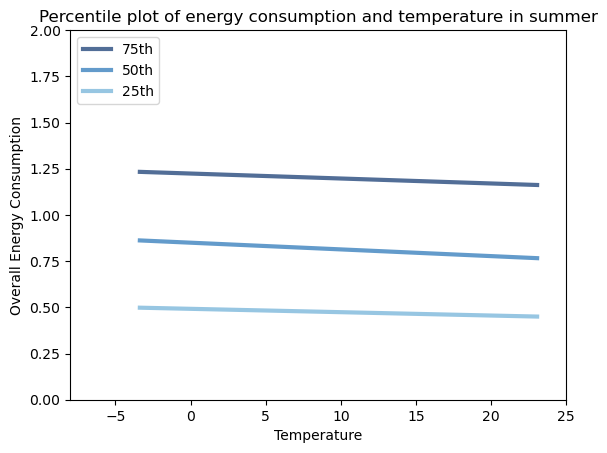

In [85]:
# Percentile plot of apparent temperature and overall energy consumption in summer
plot_Percentile(summer_energy, var1 = 'apparent_temperature', var2 = 'house_overall', bin_low = 2, bin_high = 8, binwidth = 10, 
                xlabel = "Temperature", ylabel = "Overall Energy Consumption",
                title = "Percentile plot of energy consumption and temperature in summer", axis = [-8, 25, 0.0, 2])

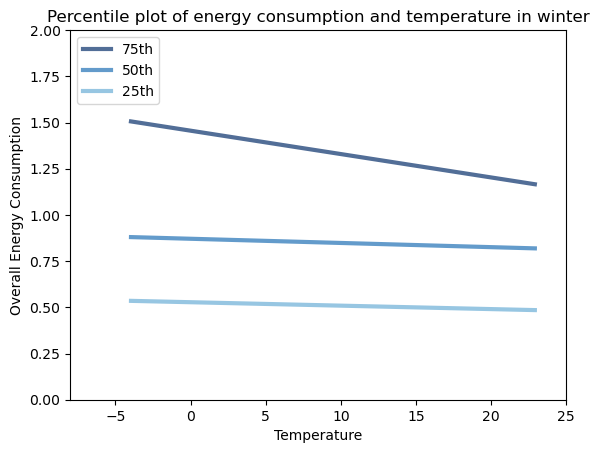

In [86]:
# Percentile plot of apparent temperature and overall energy consumption in winter
plot_Percentile(winter_energy, var1 = 'apparent_temperature', var2 = 'house_overall', bin_low = 2, bin_high = 8, binwidth = 10, 
                xlabel = "Temperature", ylabel = "Overall Energy Consumption",
                title = "Percentile plot of energy consumption and temperature in winter", axis = [-8, 25, 0.0, 2])

__Interpretation:__

The Percetile plots for energy consumption and generation for all four seasons with weather conditions such as temperature and clod cover share a strong linear relationship throughout 

%%latex
\newpage

In [87]:
# Pearson and Spearman correlation between energy consumption and generation
energyGen3 = energy_df.solar
cloudCov3 = energy_df.cloud_cover
calc_PearsonCorr(energyGen3, cloudCov3), calc_SpearmanCorr(energyGen3, cloudCov3)

(0.0387654584821754, 0.01784688562204045)

In [88]:
# Pearson and Spearman correlation between energy consumption and temperature
energyCon4 = energy_df.house_overall
appTemp4 = energy_df.apparent_temperature
calc_PearsonCorr(energyCon4, appTemp4), calc_SpearmanCorr(energyCon4, appTemp4)

(-0.20130193813661684, -0.21182653153227166)

__Interpretation:__

The spearman and pearsons correlation for solar cloud cover shows a slight difference in the results which may have caused because Pearsons correlation metho may underestimate the correlation if the relationship is non-linear which is handled well with the Spearman's method, moreover, Pearsons correlation may get affceted by the presence of outliers in the data, in such case spearmans method can be proven robust as it uses the data as ranks. 

This difference can be minimized by taking the log take values of the variable with lower correlation value, in our example the energy consumption and temperature are already showing almost equal correleation value with both the methods, but for solar and cloud cover, the difference can be rectified y taking log value.

%%latex
\newpage

## Question 9

__Conduct a test on your hypothesis using one of the methods covered in Chapter 9)__

In [89]:
# With the reference of the book thinkstats2, creating a Class which represents the structure of classic Hypothisi Test
# Based on the Modeule, We first choose test statistics, perform null hypothesis and finally find p-value and learn its significance. 
# Creating a class that conducts Classical Hypothesis Test thats uses multiple functions such as init, Pvalue starting with initial setup

# __init__ takes the data, calls Create_Model, which builds a representation of the null hypothesis, finally, it passes the data to Test_Statistics, which computes the size of the effect in the sample.
# calc_PValue takes number of iterations and computes the probability of the apparent effect under the null hypothesis

class Test_Hypothesis(object):
    # The initial setup function will execute the code once it is called in the script. It delivers a array lengths from actual value 
    # as a test statistics for comparison with conducted hypothesis tests 
    def __init__(self, input_data):
        self.input_data = input_data
        self.Create_Model()
        self.actual_value = self.Test_Statistics(input_data)

    # Creating a function to compute the final PValue. 
    # It takes self and iterations as argument and returns the Pvalue as a ratio of eligible count to iteration
    def calc_PValue(self, iterations = 1000):
        # Uses Run_Model module and collects the result in a list for loops through each number of iterations.
        # It compares the actual value with east value in the test stats lists, then stores the value in total count if it is greater
        self.testStats = [self.Test_Statistics(self.Run_Model()) for _ in range(iterations)]
        total_count = sum(1 for test_value in self.testStats if test_value >= self.actual_value)
        # Calculates and prints the Pvalue as a ratio os count of total count to the number of iterations
        
        return total_count / iterations
    
    # Creating functions to handle exceptions if not defined
    def Test_Statistics(self, input_data):
        raise UnimplementedMethodException()
 
    def Create_Model(self):
        pass
    
    def Run_Model(self):
        raise UnimplementedMethodException()

In [90]:
# With the reference of the book thinkstats2, the following class uses the method of finding the difference between the 
# means of the two groups of input data. performs test using various data samples, calculate the count of the difference in the means of different groups exceeds the original difference.
# If the difference is lesser than 5%, we conclude the results as statistcially significant and reject the Null hypothesis.

class Diffmeans_permute(Test_Hypothesis):

    # Creating a function computes the size of the effect in the sample. It splits data into two subsets, calculates the difference between their means an dreturns derived test stats
    def Test_Statistics(self, input_data):
        data_subset1, data_subset2 = input_data
        test_statMeans = abs(data_subset1.mean() - data_subset2.mean())
        return test_statMeans

    # Creating a function that makes a Model using input inpute data for further testing
    def Create_Model(self):
        # Splits the input data into two subsets and stores their size in variables
        data_subset1, data_subset2 = self.input_data
        self.data_subset1_len, self.data_subset2_len = len(data_subset1), len(data_subset2)
        # Combines the data from both subsets and create a single array 
        self.datapool = np.hstack((data_subset1, data_subset2 ))

    # Creating a function that will run the Model for given number of iterations and returns result
    def Run_Model(self):
        # Takes random Shuffle the data in combined dataset and create a sample that has sample dimensions as the original data using the length of two data subsets
        np.random.shuffle(self.datapool)
        input_data = self.datapool[:self.data_subset1_len], self.datapool[self.data_subset1_len:]
        return input_data

In [91]:
# With the reference of the book thinkstats2, This class is derived from HypothesisTes which uses the correlation between two groups of input data.
# perfoming the test with various data samples, we can calculate the count of the correlation between the groups exceeds 
# the original value in order to study the significance of statistics. (If the count is lesser than 5%, the result is statistically significant and  we reject the Null hypothesis.

class Corr_permute(Test_Hypothesis):

    # This function creates two subsets of input data, calulates its length and returns the correlation between to subsets
    def Test_Statistics(self, input_data):
        data_subset1, data_subset2 = input_data
        # find the absolute value of correlation between two groups
        test_statsCorrs = abs(thinkstats2.Corr(data_subset1, data_subset2))
        return test_statsCorrs
    
    # Creating a function that will run the Model for given number of iterations and returns result
    def Run_Model(self):
        # This function creates two subsets of input data, Shuffle the first subset and 
        # return the series and computes the correlation between the shuffled data
        data1, data2 = self.input_data
        data1 = np.random.permutation(data1)
        return data1, data2

In [92]:
# Creating a function to generate data sample rows 
# It takes dataframe and number of rows to be generated and return an array of random sample rows
def Sample_Rows(df, nrows, replace = False):

    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [93]:
# Creating a function to utilise sample row function and generate the sampled data
# It takes dataframe, number to samples to be generatedand returns a sampled dataframe of df1, df2 with desired length
def create_samples(df1, df2, sample_len = 500):

    sample_df1 = Sample_Rows(df1, sample_len)
    sample_df2 = Sample_Rows(df2, sample_len)
    return sample_df1,sample_df2

In [94]:
# Calculating the mean of energy consumed in summer and in winter
weekdays_df1.house_overall.mean(), weekends_df1.house_overall.mean()

(0.8955223421614159, 0.8912575235109718)

The mean of energy consumed on weekdays and the mean of energy consumed on weekends are almost equal we can furthur explore these datasets to make our findings more consolidated with the use of hypothesis tests which tests resampled data over number of iterations

In [95]:
# Running the Hypothesis test on overall enery consumption on weekdays and on weekends
sample_weekdaysEn, sample_weekendsEn = create_samples(weekdays_df1, weekends_df1)
energy_con = sample_weekdaysEn.house_overall.values, sample_weekendsEn.house_overall.values
# Running the hypothesis test on means
Con_HTest1 = Diffmeans_permute(energy_con)
# Calculating the P-value
Con_pvalue1 = Con_HTest1.calc_PValue()
Con_pvalue1

0.713

__Interpretation:__

The p-value shows the measure of evidence against the null hypothesis of the data, in our example the pvalue of energy consumption on weekdays and weekends shows 0.152 (higher than 0.05) meaning there is zero or null evidence that the correlation that the correlation is significant, making it statistically insignificant.

In [96]:
# Creating male and female df samples of length 500
sample_summerEn1, sample_winterEn1 = create_samples(summer_energy, winter_energy)
energy_gen = sample_summerEn1.solar.values, sample_winterEn1.solar.values
# Running the hypothesis test on means
Gen_HTest1 = Diffmeans_permute(energy_gen)
# Calculating the P-value
Gen_pvalue1 = Gen_HTest1.calc_PValue()
Gen_pvalue1

0.099

__Interpretation:__

The p-value shows the measure of evidence against the null hypothesis of the data, in our example the pvalue of energy generation in summer and in winter shows 0.26 (higher than 0.05) meaning there is zero or null evidence that the correlation that the correlation is significant, making it statistically insignificant.

In [97]:
class std_hyptest(Diffmeans_permute):
    # Creating Hypothesis test by calculating Standard deviation
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [98]:
# Creating summer_energy, winter_energy samples of length 500
sample_summerEn2, sample_winterEn2 = create_samples(summer_energy, winter_energy)
energy_con2 = sample_summerEn2.house_overall.values, sample_winterEn2.house_overall.values
Con_HTest2 = std_hyptest(energy_con2)
Con_pvalue2 = Con_HTest2.calc_PValue()
Con_pvalue2

0.021

In [99]:
# Creating weekdays_df, weekends_df samples of length 500 
sample_summerEn3 = Sample_Rows(summer_energy, 500)
energy_con3 = sample_summerEn3.house_overall.values, sample_summerEn3.cloud_cover.values
# Performing Hypothesis test and calculating the pvalue
Con_HTest3 = Corr_permute(energy_con3)
Con_pvalue3 = Con_HTest3.calc_PValue()
Con_pvalue3

0.377

In [100]:
# Creating weekdays_df, weekends_df samples of length 500 
sample_winterEn3 = Sample_Rows(winter_energy, 500)
energy_con4 = sample_winterEn3.house_overall.values, sample_winterEn3.apparent_temperature.values
# Performing Hypothesis test and calculating the pvalue
Con_HTest4 = Corr_permute(energy_con4)
Con_pvalue4 = Con_HTest4.calc_PValue()
Con_pvalue4

0.0

__Interpretation:__

The p-value shows the measure of evidence against the null hypothesis of the data, in our example the Hypothesis testing for both the variables shows the results are statistically significant with their p value being much lower than 0.05. Meaning the correlation between the energy consumption and temperature or energy generation with cloud cover is very unlikely to occur by chance. 

%%latex
\newpage

## Question 10

__For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).__

In [101]:
# Creating a Regression model overall energy consumption for predictors as electrical appliance data
formula1 = 'house_overall ~ dishwasher + home_office + fridge + garage_door + microwave + living_room + furnace + kitchen'
# Using Statsmodel function to create and summarize the model
model1 = smf.ols(formula1, data = energy_df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          house_overall   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:50:28   Log-Likelihood:                 6950.2
No. Observations:               22314   AIC:                        -1.388e+04
Df Residuals:                   22305   BIC:                        -1.381e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2189      0.017     13.094      0.000       0.186       0.252
dishwasher      0.9628      0.009    111.353      0.000       0.946       0.980
home_office     2.7840      0.092     30.342      0.000       2.604       2.964
fridge          1.3824      0.017     80.440      0.000       1.349       1.416
garage_door     2.2223      0.139     16.037      0.000       1.951       2.494
microwave       1.1008      0.051     21.427      0.000       1.000       1.202
living_room   -70.7529     10.096     -7.008      0.000     -90.542     -50.964
furnace         1.1007      0.003    325.761      0.000       1.094       1.107
kitchen         1.0625      0.022     47.456      0.000       1.019       1.106
==============================================================================
Omnibus:                    16611.974   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           344235.578
Skew:                           3.439   Prob(JB):                         0.00
Kurtosis:                      20.970   Cond. No.                     9.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Interpretation:__

the result of regresson model is as shown above where we have tried to predict the value of overall enerrgy consumption with energy data of each individual equipment and area of a home. The R-squared value represents the goodness-of-fit measure for linear regression models. In our example it is 0.848 meaning the prediction model is about 84% accurate. The pvalue indicates the statistical significance, here it is 0 meaning the resulst are statistically significant and they are unlikely to occur by chance and the model can be used for energy consumption prediction.

In [102]:
# Creating a Regression model overall energy consumption for predictors as weather data
formula2 = 'house_overall ~ temperature + humidity + apparent_temperature + windspeed + cloud_cover + wind_bearing + precip_intensity + dew_point + precip_probability'
# Using Statsmodel function to create and summarize the model
model2 = smf.ols(formula2, data = energy_df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          house_overall   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     128.8
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.19e-237
Time:                        18:50:28   Log-Likelihood:                -13525.
No. Observations:               22314   AIC:                         2.707e+04
Df Residuals:                   22304   BIC:                         2.715e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8414      0.208      8.834      0.000       1.433       2.250
temperature             -0.0299      0.007     -4.274      0.000      -0.044      -0.016
humidity                -0.8130      0.229     -3.548      0.000      -1.262      -0.364
apparent_temperature     0.0080      0.002      3.463      0.001       0.003       0.013
windspeed                0.0030      0.002      1.633      0.102      -0.001       0.006
cloud_cover              0.1096      0.016      7.040      0.000       0.079       0.140
wind_bearing          1.245e-05   2.79e-05      0.446      0.656   -4.23e-05    6.72e-05
precip_intensity        -9.3652      4.522     -2.071      0.038     -18.228      -0.502
dew_point                0.0112      0.006      1.937      0.053      -0.000       0.023
precip_probability       0.2203      0.124      1.774      0.076      -0.023       0.464
==============================================================================
Omnibus:                     1197.944   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.565
Skew:                           0.606   Prob(JB):                    3.00e-302
Kurtosis:                       2.840   Cond. No.                     3.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Interpretation:__

The result of regresson model is as shown above where we have tried to predict the value of overall enerrgy consumption with weather data. The R-squared value represents the goodness-of-fit measure for linear regression models. In our example it is 0.049 meaning the prediction model is not a good fir for prection. However, The pvalue indicates the statistical significance, here some variables are in the range 0-0.05 meaning these variables are statistically significant and they are unlikely to occur by chance.

In [103]:
# Creating a Data Mining function that identifies explanatory variables
# It takes join_df dataframe (data from which each variable is to be tested) and fieldname (as a dependent variable)
# And returns a list of pairs (R-square, varianle name) value
# Creating a Data Mining function that identifies explanatory variables
# It takes join_df dataframe (data from which each variable is to be tested) and fieldname (as a dependent variable)
# And returns a list of pairs (R-square, varianle name) value

def Mine_data(join_df, field_name):
    # Creating a list for storing the Rsquared resulst of each variables
    fields_R2 = []
    # Iterating  each column of the dataframe, check ther significance on the redictive variables and adds to the list
    # Also, applying exception/ error handling to try and catch errors
    for name in join_df.columns:
        try:
            # Checks each item of the column for their variance value and excludes columns that have smaller variance
            if join_df[name].var() < 1e-7:
                continue
            # String regression formula in a varianle to to used in pred_model where field_name is a dependent variable
            # and item is explanatory value to be used for statsmodel.formula.api to calculate the ordinary least squares
            reg_eq = field_name + " ~ + " + name
            pred_model = smf.ols(reg_eq, data = join_df)
            # Checks for the Valid length of the observation and ignores columns with multiple NA values
            if pred_model.nobs < len(join_df) / 2:
                continue
            # Using the fit function to fit our model and store the result in a variable
            res_model = pred_model.fit()
        except (ValueError, TypeError, patsy.PatsyError) as e:
            continue
        # Appending results of all R square values to our list
        fields_R2.append((res_model.rsquared, name))
    return fields_R2

In [104]:
# Creating a function to call data mine function an dplot the regression model 
# It takes dataframe and field name as input and returns the r squared values of the column
def create_RegModel(df,colname):

    fields_R2 = Mine_data(df,colname)
    # Sorting the results to select the most significant values for analysis and printing the results of top 20 values
    fields_R2.sort(reverse = True)
    for rsq, col in fields_R2[:20]:
        print(rsq, col)

In [105]:
# Running Regression function to identify the variables that have highest R2 values
create_RegModel(energy_df,'kitchen')

1.0 kitchen
0.012067020066798606 house_overall
0.006589085320683807 home_office
0.0027313469391346823 pressure
0.0021993028732645303 humidity
0.002192332073136072 windspeed
0.0009036833769753283 temperature
0.0007386994502094346 furnace
0.0007143935470173002 year
0.0002559213700517038 visibility
0.0002495630938692539 month
0.00020861480888445527 fridge
0.00020132217590240753 wind_bearing
0.00015365805288258816 barn
8.985918670156856e-05 wine_celler
8.067569532843599e-05 precip_intensity
6.413949496519855e-05 precip_probability
2.1167732038307463e-05 well
1.7111048980278376e-05 apparent_temperature
1.6936001281275814e-05 dew_point


__Interpretation:__

This analysis simply shows that the along with weather being more responsible for more energy consumption, our of all appliances in kitcehn, fridge uses the more energy.

%%latex
\newpage

In [106]:
# Running Regression function to identify the variables that have highest R2 values
create_RegModel(summer_energy,'house_overall')

1.0 house_overall
0.688770401861585 furnace
0.0768108172285481 dishwasher
0.06525588069915167 fridge
0.06350842680715851 dew_point
0.047776597210156035 temperature
0.045149822013518914 apparent_temperature
0.0389151937809189 well
0.02891210003485889 barn
0.022380409407871782 humidity
0.01991965527124817 solar
0.015932393964730673 home_office
0.013786844999742365 wine_celler
0.013207235448412069 kitchen
0.005788518475554172 precip_probability
0.005451008058793838 precip_intensity
0.004998998795551102 pressure
0.0032225365885689694 cloud_cover
0.0025302412042872424 visibility
0.0024113210084145686 windspeed


%%latex
\newpage

In [107]:
# Generating a regression model or overall energy consumption with top predictor variables from above results

model_energy_con = smf.ols('house_overall ~  furnace + living_room + well + solar + barn + dishwasher + fridge + microwave', data = energy_df)
# Using Statsmodel function to create and summarize/describe the model
res_model_energy_con = model_energy_con.fit()
res_model_energy_con.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          house_overall   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.637e+04
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:50:28   Log-Likelihood:                 12098.
No. Observations:               22314   AIC:                        -2.418e+04
Df Residuals:                   22305   BIC:                        -2.411e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2938      0.013     21.925      0.000       0.268       0.320
furnace         1.0956      0.003    405.756      0.000       1.090       1.101
living_room   -45.2373      8.290     -5.457      0.000     -61.487     -28.988
well            1.0287      0.012     83.389      0.000       1.005       1.053
solar          -2.1265      0.069    -30.873      0.000      -2.262      -1.992
barn            1.2953      0.012    107.295      0.000       1.272       1.319
dishwasher      1.0050      0.007    146.114      0.000       0.992       1.019
fridge          1.3805      0.014    101.249      0.000       1.354       1.407
microwave       0.9770      0.041     23.943      0.000       0.897       1.057
==============================================================================
Omnibus:                    18820.249   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           832498.462
Skew:                           3.833   Prob(JB):                         0.00
Kurtosis:                      31.924   Cond. No.                     9.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Interpretation:__

The result of model using datamining method is as shown above where we have tried to predict the value of overall energy consumption with the variables that have highest R squared value.  The R-squared value represents the goodness-of-fit measure for linear regression models. In our example, he resultant model shows it is 0.904 meaning the prediction model is about 90% accurate. The pvalue indicates the statistical significance, here it is 0 meaning the results are statistically significant and they are unlikely to occur by chance and the model can be used for predicting energy consumption.

%%latex
\newpage

# Limitations and Assumptions


The exploratory data analysis on the energy consumption of home has shown fascinating results and has surely enlightened us with the answers to the questions we formed at the beginning of the research. Naturally, like all studies and reaseached we often come across some data and findings where we have to assume the causation and understand the weeknesses in the data. After a thorough analysis of the data at hand I have came across the following limitations where I assumed some conditions to be true in order to fix the limitations on this project:

The dataset has been recorded over a very long timeframe but for a single house only, which limits or questions the final findings our of analysis to be undetermined on a broader scale.  

While this data offers a realtime energy consumption data for many individual appliances but it fails to provide the power rating for each appliance which plays a major role in how much power a single machine can draw making the final energy usage data restricted to a particular scenario where similar equipments are installed.  

The weather and energy data can easily get affected by the storms, power surges and short circuiting, while such data can play important role in predicting the energy and weather correlation, we have removed such data points in order to keep our data limited to ideal conditions.  

This data is also limited to the geographical dependencies, if we remove the unideal conditions impacting the final readings it can be applied to any geolocation to get similar outcomes.

As this data provides records varying with a very smaller fraction over the time, the outcome of such data is large datapoints which impacts the overall readability of its visual representation. Such conditions have been modified by plotting only a smaller portion of the data on the plot axis to ensure the clarity of reading the trends. 

Keeping the above condition in  mind, we have assumed the data follows similar pattern, the improved pmf plots shows a smaller range of datapoints which may impact the final finding of our research.

Studying data patterns from a single source can highly impact the overall accuracy of the findings, we have tried to keep our data ideal to help improve its overall adaptability.

%%latex
\newpage

# Summary and Conclusion

Efficient use of energy results in lower energy costs, reduced CO2 emmisions and finally, reduces use of fossil fuels. While we move towards green energy, understanding the nature of our energy usage and knowing whether weather also plays any part of our final energy demand can help with significant reduction of energy use thereby improving efficincy. As we studied the nature of energy use of a single home for five years, the use of such large scale data have resulted in the interesting findings and provided a better understanding of how the final demand also impacted with our choice of appliances, their energy star rating and time and duration of use.

We started this study with our hands on large data with limited source but having studied the entirity of its nature visually, with statistical techniques, keeping in mind the limitations and implications of the data, the various assumption have surely made the approach to this analysis successful with meaningful results.

With the completion of this analysis, we can finally summarise our findings and outcomes by stating whether they help answer the questions we formed at the beginning,

__Does our overall energy demand change with weather conditions?__

We used the overall energy consumption records and time to study and analyze the trends in energy usage and found that the energy demand have surely changed with the weather or the at which the data was recorded. We have seen that in colder weather such as in fall and winter the energy consumtpion is slightly higher than in summer and spring. This is because the furnace consumed more power thereby increasing the overall consumption in colder climate.
    
    
__Do kitchen appliances such as Microwave or dishwasher consume more energy than any other appliances?__

We used regression analysis to find the variables with high R squared values for energy consumption in kitchen, surely with weather data being the topmost data fields with high Rsquare value, the next variable responsible of predicting the energy consumption is fridge, making it the highest of all appliances in the kitchen other than microwave, dishwasher, to consume more energy.

__Do we consume more enegry on weekends vs on weekdays?__

Suprisingly, yes!!! The most fascinating finding our this analysis is when we witnessed energy consumption on weekends follows almost exact same pattern as consumption on weekdays making our energy cosumption higher on weekends. Imagine using same amount of energy in five days of a week as oppose to in two days ending the week- Satureday and Sunday. Is it really possible? well, yes if we assume the residents in this home attends in person job and only available at home on weekends, the overall energy consimption on weekdays can match the overall consumption of weekends or at least thats what our data suggests. 

__Is our energy consumption more in summer than in winter?__
    
Our findings took a surprising turn with the outcome of our seasonal energy comparison showing the energy consumption was actually more in winter than in summer. Here, with this finding we have also learned that the space heating consumes more energy than cooling. This finding is open for debate as the air conditioning data is not actually available. But even with deducing the cooling needs from the overall consumption by subtarcting the availble data, it is still lower than the furnace data making our assumption valid.

__Does alternate energy sources such as solar generate more energy in summer than in winter?__

While our datasetalso include energy generation data by solar source it surely does not shows wether its an alternate source of energy suuply. As the study of datapoints in solar field shows energy production a very smaller scale, we can say it is not a alternate energy source. Nevertheless we were still able to study and analyze this data. Our findings suggest that the energy generation was actual more in winter than in summer by just a smaller difference. Which help us know in winer sky was more clearer and overall energy generation in summer shows reduction due to overcast in summer weather pattern.  
     

__Do we consume more energy than we generate?__

The data for energy generation by a solar source lacks in identifying where the solar source is applied. In simpler words, whether the source is solar panels or simply the solar powered outdoor lighting system is undefined. With that in mind, our final finding remains inconclusive or limited to a assumption that the nature of lower generation capacity is an indication of the solar source is applied to outdoor solar lighting making lower generation capacity than consumption. With this assumption our final results cannot help us conclude overall energy generation and consumption demand of the house. 


Finally, the exploratory data anaysis on the enenrgy consumption and weather data has helped us gain a unique and meaningful perpsective on how we energy consumption changes with time, throughout seasons and with different types of appliances. If this study is recorded on a larger scale with multiple sources at multiple geolocations, the resultant dataset can help us achieve maximum overall home effiency along with awareness of energy demands on weather.